
# Análisis Exploratorio de Datos - TP1

Gruopo 4 - Precios Claros - Base SEPA

Nombres del grupo

* a2107 – Calabia, Juan Manuel
* a2102 – Andújar, Martín Rodrigo
* a2125 – Otonelo Canale, Nahuel Elías


**Dataset elegido:** Precios Claros - Base SEPA

En esta notebook realizamos un análisis exploratorio completo del dataset de productos ofrecidos por cadenas de supermercados, con el objetivo de:

- Comprender la estructura y calidad de los datos
- Visualizar patrones relevantes
- Plantear un problema supervisado de machine learning


Los archivos suministrados son 3 dataframes:

- productos (tabla de hechos)
- sucursales (tabla de dimensiones)
- comercios (tabla de dimensiones)

Se analizarán las tres tablas ya que mergeando podemos obtener mucha mas informacion.

El trabajo constará de 3 secciones

**1- Exploración y comprensión de los datos**

**2- Aplicación de técnicas de visualización**

**3- Planteo de un posible problema de ML supervisado a partir de los datos elegidos**

## 1 - Exploración y comprensión de los datos

### Exploración del dataframe productos

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.ticker as mticker

In [54]:
import sys
print(sys.executable)


/usr/bin/python3


Leemos el csv y traemos los datos como object. Luego los modificamos y transformamos al formato adecuado.

In [55]:
producto = pd.read_csv("productos.csv", sep="|", encoding="utf-8", dtype=str)
producto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944411 entries, 0 to 2944410
Data columns (total 17 columns):
 #   Column                                Dtype 
---  ------                                ----- 
 0   id_comercio                           object
 1   id_bandera                            object
 2   id_sucursal                           object
 3   id_producto                           object
 4   productos_ean                         object
 5   productos_descripcion                 object
 6   productos_cantidad_presentacion       object
 7   productos_unidad_medida_presentacion  object
 8   productos_marca                       object
 9   productos_precio_lista                object
 10  productos_precio_referencia           object
 11  productos_cantidad_referencia         object
 12  productos_unidad_medida_referencia    object
 13  productos_precio_unitario_promo1      object
 14  productos_leyenda_promo1              object
 15  productos_precio_unitario_promo2

Miraremos los valores únicos para determinar la importancia de cada atributo

In [56]:

producto = producto.rename(columns={"ï»¿id_comercio": "id_comercio"})

producto
# Lista de las columnas de las que quieres ver los valores únicos
columnas_a_revisar = [
    'productos_ean',
    'id_bandera',
    'id_comercio',
    'id_sucursal',
    'productos_cantidad_presentacion',
    'productos_cantidad_referencia',
    'productos_leyenda_promo1',
    'productos_precio_unitario_promo1',
    'productos_leyenda_promo2',
    'productos_precio_unitario_promo2'
]

# Iterar sobre la lista de columnas e imprimir los valores únicos de cada una
print("--- Valores Únicos por Columna ---")
for col in columnas_a_revisar:
    # Comprobamos si la columna existe en el DataFrame para evitar errores
    if col in producto.columns:
        valores_unicos = producto[col].unique()
        print(f"\nColumna: '{col}'")
        print(valores_unicos)
    else:
        print(f"\nAdvertencia: La columna '{col}' no se encontró en el DataFrame.")

--- Valores Únicos por Columna ---

Columna: 'productos_ean'
['1' '0' nan]

Columna: 'id_bandera'
['1' '3' '2' nan]

Columna: 'id_comercio'
['10' 'Ultima actualización: 2025-06-27T05:13:49-03:00']

Columna: 'id_sucursal'
['63' '711' '44' '62' '147' '54' '438' '290' '482' '289' '125' '123' '697'
 '48' '288' '23' '462' '599' '15' '212' '557' '656' '563' '1' '16' '526'
 '767' '120' '272' '241' '161' '21' '490' '28' '203' '268' '175' '150'
 '17' '605' '205' '41' '183' '263' '9' '240' '719' '46' '265' '348' '577'
 '11' '5' '536' '299' '338' '450' '8' '29' '229' '31' '386' '766' '216'
 '714' '259' '182' '497' '214' '600' '597' '757' '184' '22' '12' '650'
 '729' '747' '115' '341' '616' '219' '211' '7' '367' '10' '694' '218'
 '232' '226' '234' '255' '363' '2' '47' '297' '215' '277' '119' '239'
 '496' '18' '233' '217' '296' '213' '735' '792' '295' '580' '191' '796'
 '466' '26' '179' '415' '51' '143' '672' '667' '627' '680' '574' '162'
 '243' '118' '475' '130' '42' '391' '33' '429' '52' '30' '22

**Columnas a eliminar:**
- id_comercio: porque en todos los registros es 10 (pertenece a Carrefour)
- productos_leyenda_promo2: las columnas de promo_2 tienen valores nulos
- productos_precio_unitario_promo2
- productos_ean: es una codificacion de codigo de barras


Podemos eliminarlas porque consideramos que no aportan informacion


**Columnas para pasar a int**
- id_sucursal
- productos_cantidad_referencia

**Columnas para convertir a float32**  
- productos_precio_lista
- productos_precio_referencia
- productos_precio_unitario_promo1

Las otras columnas las dejamos como string


In [57]:
producto.drop(columns=[
    'productos_ean',
    'id_comercio',
    'productos_cantidad_presentacion',
    'productos_leyenda_promo2',
    'productos_precio_unitario_promo2'
], inplace=True)


columnas_a_convertir_int = [
    'id_bandera',
    'id_sucursal',
    'productos_cantidad_referencia'
]



for col in columnas_a_convertir_int:
    if col in producto.columns:

        # Paso A: Convertir a numérico, forzando errores a NaN
        producto[col] = pd.to_numeric(producto[col], errors='coerce')

        # Paso B: Convertir a tipo entero nulable (Int64)
        producto[col] = producto[col].astype('Int64')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")


columnas_a_convertir_float = [
    'productos_precio_lista',
    'productos_precio_referencia',
    'productos_precio_unitario_promo1'
]


for col in columnas_a_convertir_float:
    if col in producto.columns:

        # Paso A: Convertir a numérico, forzando errores y vacíos a NaN
        # Paso B: Convertir al tipo float32 para ahorrar memoria
        producto[col] = pd.to_numeric(producto[col], errors='coerce').astype('float32')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")

producto['productos_marca'] = producto['productos_marca'].replace('S/D', pd.NA)
producto['productos_marca'] = producto['productos_marca'].astype('string')



In [58]:

for col, dtype in producto.dtypes.items():
    # Verificamos si el tipo de dato actual de la columna es 'object'
    if dtype == 'object':
        #print(f"Transformando columna '{col}' de tipo '{dtype}' a 'string'...")
        # Si es 'object', la convertimos a 'string'
        # Esto también se encargará de convertir None/np.nan a pd.NA si los hay.
        producto[col] = producto[col].astype('string')
    # Opcional: puedes añadir un else if si quisieras hacer algo con otras columnas
    # elif dtype == 'string':
    #     print(f"Columna '{col}' ya es de tipo 'string'.")
    # else:
    #     print(f"Columna '{col}' es de tipo '{dtype}'. No se modifica.")
producto.to_pickle('producto.pkl')
print(producto.dtypes)

id_bandera                                       Int64
id_sucursal                                      Int64
id_producto                             string[python]
productos_descripcion                   string[python]
productos_unidad_medida_presentacion    string[python]
productos_marca                         string[python]
productos_precio_lista                         float32
productos_precio_referencia                    float32
productos_cantidad_referencia                    Int64
productos_unidad_medida_referencia      string[python]
productos_precio_unitario_promo1               float32
productos_leyenda_promo1                string[python]
dtype: object


En el listado anterior pueden verse los tipos de variables. Para valores enteros, se uso Int64, float32 para decimales y string (en lugar de object) para caracteres.

In [59]:
producto.describe()

,id_bandera,id_sucursal,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_precio_unitario_promo1
count,2944410.0,2944410.0,2.944410e+06,2.944410e+06,2944410.0,1.301340e+05
mean,1.920532,284.582108,1.357243e+04,2.456660e+04,333.566095,8.431066e+04
std,0.886544,231.803274,7.880480e+04,1.836935e+05,491.608742,2.300750e+05
min,1.0,1.0,2.800000e-01,1.600000e-01,0.0,1.900000e+01
25%,1.0,56.0,1.799000e+03,3.633330e+03,7.0,1.959000e+03
50%,2.0,229.0,3.240000e+03,8.500000e+03,170.0,6.990000e+03
75%,3.0,461.0,6.655000e+03,1.829412e+04,500.0,3.999000e+04
max,3.0,810.0,7.349000e+06,4.203333e+07,8000.0,6.199000e+06


**Eliminacion de Outliers para poder ver la distribucion de precios**

Creemos que es relevante eliminar los valores ouliers de la columna productos_precio_lista, pero sin sobreescribir el dataframe, es decir, creamos otro dataframe llamado producto_sin_outliers.

In [60]:
# 1. Define las columnas de precios a revisar
columnas_precio = [
    'productos_precio_lista',

]

# 2. Inicializa una máscara booleana para marcar filas como outliers.
#    Inicialmente, ninguna fila es considerada un outlier.
is_outlier = pd.Series(False, index=producto.index)

# 3. Itera sobre cada columna de precios para encontrar sus outliers
for col in columnas_precio:

    if col in producto.columns and not producto[col].isnull().all():
        # Calcula Q1, Q3 y el IQR para la columna actual
        Q1 = producto[col].quantile(0.25)
        Q3 = producto[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calcula los límites
        limite_inferior = 0
        limite_superior = Q3 + 1.5 * IQR

        # Identifica los outliers para ESTA columna
        outliers_en_columna = (producto[col] < limite_inferior) | (producto[col] > limite_superior)

        # Actualiza la máscara general. Una fila se marca como outlier
        # si es un outlier en la columna actual O si ya estaba marcada.
        is_outlier = is_outlier | outliers_en_columna

        print(f"\nRevisando '{col}':")
        print(f"  - Límite inferior: {limite_inferior:.2f}, Límite superior: {limite_superior:.2f}")
        print(f"  - Outliers encontrados en esta columna: {outliers_en_columna.sum()}")

# 4. Filtra el DataFrame original para quedarte solo con las filas que NO son outliers
#    El operador ~ invierte la máscara (True se vuelve False y viceversa)
producto_sin_outliers = producto[~is_outlier]

#producto_sin_outliers



Revisando 'productos_precio_lista':
  - Límite inferior: 0.00, Límite superior: 13939.00
  - Outliers encontrados en esta columna: 334327


¿Cuales son los productos mas costosos y cuales los menos costosos?

Podemos ver que el mas costoso, esta en 3 sucursales distintas y al mismo precio.

In [61]:
producto.loc[producto['productos_precio_lista']==producto['productos_precio_lista'].max()]

,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1
53507,1,2,8806094957488,SMART TV 77 SAMSUNG TIZEN 4K OLED GQN77S90CAGCZB,UNI,<NA>,7349000.0,7349000.0,1,UNI,6199000.0,Promo A valida desde el 24/06/2025 hasta 29/06...
776165,1,11,8806094957488,SMART TV 77 SAMSUNG TIZEN 4K OLED GQN77S90CAGCZB,UNI,<NA>,7349000.0,7349000.0,1,UNI,NaN,<NA>
787613,1,8,8806094957488,SMART TV 77 SAMSUNG TIZEN 4K OLED GQN77S90CAGCZB,UNI,<NA>,7349000.0,7349000.0,1,UNI,NaN,<NA>


El producto mas costoso es un televisor de 77 pulgadas. Es interesante ver que ese producto está al mismo precio en 3 distintas sucursales.

In [62]:
producto.loc[producto['productos_precio_lista']==producto['productos_precio_lista'].min()]

,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1
942985,1,128,7798111301552,BOLSA AMERICANA 26X12X37.5 X 500 UNID,UNI,<NA>,0.28,0.28,1,UNI,NaN,<NA>


El producto de menos precio es una bolsa. Muy posiblemente este producto no exista realmente ya que ese precio no tiene sentido.

In [63]:

# Porcentaje de valores faltantes
faltantes = producto.isnull().mean().sort_values(ascending=False)*100
faltantes[faltantes > 0]


,0
productos_leyenda_promo1,95.580305
productos_precio_unitario_promo1,95.580305
productos_marca,8.424503
id_bandera,0.000034
productos_descripcion,0.000034
id_producto,0.000034
id_sucursal,0.000034
productos_unidad_medida_presentacion,0.000034
productos_precio_referencia,0.000034
productos_precio_lista,0.000034


In [64]:
producto.iloc[-1]

,2944410
id_bandera,<NA>
id_sucursal,<NA>
id_producto,<NA>
productos_descripcion,<NA>
productos_unidad_medida_presentacion,<NA>
productos_marca,<NA>
productos_precio_lista,NaN
productos_precio_referencia,NaN
productos_cantidad_referencia,<NA>
productos_unidad_medida_referencia,<NA>


**Análisis de tipo de valores faltantes**

Podemos ver que el 95.6 % de los valores de las columnas relacionadas con promo1 son nulos porque sencillamente en esas filas solo hay productos en promocion. Este tipo de valor faltante es MAR (Missing at Random).

Y en las otras filas, el valor nulo corresponde a la ultima fila que es un valor erroneo o faltante. En realidad esa fila correspondia a la fecha de actualizacion del archivo csv.

Creamos el dataframe _promociones_ que será el dataframe producto pero sin los valores nulos.


In [65]:
promociones = producto[producto['productos_precio_unitario_promo1'].notnull()].copy()
promociones['descuento'] = (promociones['productos_precio_lista']- promociones['productos_precio_unitario_promo1'])/promociones['productos_precio_lista']*100
promociones.to_pickle('promociones.pkl')

### Analisis Exploratorio de los otros dataframes

Analizaremos ahora los dataframes sucursales y comercio, usaremos las columas que tienen informacion que utilizaremos para el modelo.

In [66]:
sucursales = pd.read_csv('sucursales.csv', sep="|", encoding="utf-8", dtype=str)
sucursales.sample(10)

,id_comercio,id_bandera,id_sucursal,sucursales_nombre,sucursales_tipo,sucursales_calle,sucursales_numero,sucursales_latitud,sucursales_longitud,sucursales_observaciones,...,sucursales_codigo_postal,sucursales_localidad,sucursales_provincia,sucursales_lunes_horario_atencion,sucursales_martes_horario_atencion,sucursales_miercoles_horario_atencion,sucursales_jueves_horario_atencion,sucursales_viernes_horario_atencion,sucursales_sabado_horario_atencion,sucursales_domingo_horario_atencion
261,10,3,661,Aráoz 1140,Autoservicio,Aráoz,1140,-34.594504,-58.428737,NaN,...,1414,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,11:00 a 20:00
480,10,1,241,Luján,Hipermercado,Av. Pellegrini,1050,-34.561648,-59.103745,NaN,...,6700,Luján,AR-B,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00
151,10,3,480,Av. Crovara 875,Supermercado,Av. Crovara,875,-34.696830,-58.535934,NaN,...,1629,La Matanza,AR-B,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,10:00 a 20:00
222,10,3,589,Perú 487,Autoservicio,Perú,487,-34.613625,-58.374702,NaN,...,1068,Ciudad Autónoma de Buenos Aires,AR-C,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,10:00 a 19:00
129,10,3,691,Av. La Plata 716,Autoservicio,Av. La Plata,716,-34.623822,-58.427300,NaN,...,1235,Ciudad Autónoma de Buenos Aires,AR-C,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,10:00 a 19:00
304,10,2,115,Flores,Supermercado,Av. Rivadavia,6538,-34.627423,-58.458170,NaN,...,1406,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,09:00 a 20:00
307,10,1,26,Warnes,Hipermercado,Warnes,2707,-34.595836,-58.473941,NaN,...,1427,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,09:00 a 20:00
495,10,3,394,Santa Fe 4489-91,Autoservicio,Av. Santa Fe,4489,-34.579302,-58.424094,NaN,...,1425,Ciudad Autónoma de Buenos Aires,AR-C,06:00 a 20:00,06:00 a 20:00,06:00 a 20:00,06:00 a 20:00,06:00 a 20:00,06:00 a 20:00,09:30 a 20:00
170,10,1,233,Concordia,Hipermercado,Av. Eva Perón,2250,-31.368882,-58.011377,NaN,...,3200,Concordia,AR-E,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,09:00 a 20:00
555,10,3,318,Arroyo 859,Autoservicio,Arroyo,859,-34.591563,-58.379252,NaN,...,1007,Ciudad Autónoma de Buenos Aires,AR-C,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,10:00 a 19:00


Identificamos que las columnas que aportan mas valor teniendo en cuenta el modelo que realizaremos, son las seleccionadas.

El dataframe con las columnas seleccionadas, se llama _sucur_

In [67]:
sucur = sucursales[['id_bandera', 'id_sucursal',
                         'sucursales_tipo',
                         'sucursales_codigo_postal','sucursales_provincia']].copy()
sucur

,id_bandera,id_sucursal,sucursales_tipo,sucursales_codigo_postal,sucursales_provincia
0,3,365,Autoservicio,1416,AR-C
1,3,408,Autoservicio,1068,AR-C
2,2,144,Supermercado,1900,AR-B
3,3,755,Autoservicio,1663,AR-B
4,3,479,Autoservicio,1722,AR-B
...,...,...,...,...,...
563,2,296,Supermercado,7400,AR-B
564,3,196,Supermercado,1046,AR-C
565,3,791,Autoservicio,1419,AR-C
566,2,168,Supermercado,4600,AR-Y


In [68]:
faltantes_sucur = sucur.isnull().mean().sort_values(ascending=False)*100
faltantes_sucur[faltantes_sucur > 0]

,0
id_bandera,0.176056
id_sucursal,0.176056
sucursales_tipo,0.176056
sucursales_codigo_postal,0.176056
sucursales_provincia,0.176056


El único registro con valores nulos es el último.

In [69]:
sucur.iloc[-1]

,567
id_bandera,NaN
id_sucursal,NaN
sucursales_tipo,NaN
sucursales_codigo_postal,NaN
sucursales_provincia,NaN


In [70]:
sucur['sucursales_tipo'].unique()

array(['Autoservicio', 'Supermercado', 'Hipermercado', nan], dtype=object)

In [71]:
comercio = pd.read_csv('comercio.csv', sep="|", encoding="utf-8", dtype=str)
comercio = comercio[['id_bandera', 'comercio_bandera_nombre']]
comercio['id_bandera'] = pd.to_numeric(comercio['id_bandera'], errors='coerce')
comercio['id_bandera'] = comercio['id_bandera'].astype('Int64')
comercio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id_bandera               3 non-null      Int64 
 1   comercio_bandera_nombre  3 non-null      object
dtypes: Int64(1), object(1)
memory usage: 200.0+ bytes


In [72]:
comercio.to_pickle('comercio.pkl')

In [73]:
columnas_a_convertir_int = ['id_sucursal', 'id_bandera',
       'sucursales_codigo_postal']


for col in columnas_a_convertir_int:
    if col in sucur.columns:
        #print(f"Procesando columna: '{col}'")
        # Paso A: Convertir a numérico, forzando errores a NaN
        sucur[col] = pd.to_numeric(sucur[col], errors='coerce')

        # Paso B: Convertir a tipo entero nulable (Int64)
        sucur[col] = sucur[col].astype('Int64')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")


In [74]:
for col, dtype in sucur.dtypes.items():
    # Verificamos si el tipo de dato actual de la columna es 'object'
    if dtype == 'object':
        #print(f"Transformando columna '{col}' de tipo '{dtype}' a 'string'...")
        # Si es 'object', la convertimos a 'string'
        # Esto también se encargará de convertir None/np.nan a pd.NA si los hay.
        sucur[col] = sucur[col].astype('string')
    # Opcional: puedes añadir un else if si quisieras hacer algo con otras columnas
    # elif dtype == 'string':
    #     print(f"Columna '{col}' ya es de tipo 'string'.")
    # else:
    #     print(f"Columna '{col}' es de tipo '{dtype}'. No se modifica.")
sucur.to_pickle('sucur.pkl')
print(sucur.dtypes)

id_bandera                           Int64
id_sucursal                          Int64
sucursales_tipo             string[python]
sucursales_codigo_postal             Int64
sucursales_provincia        string[python]
dtype: object


In [75]:
sucur.to_pickle('sucur.pkl')

**Generando el Tablón:**

El dataframe de nombre df será la tabla resultante del merge de las tres tablas. La creación de esta tabla es importante para poder realizar mejores visualizaciones y para realizar el modelo.

In [76]:
promociones = pd.read_pickle('promociones.pkl')
promociones.drop(columns=['id_bandera'], inplace=True)
sucur = pd.read_pickle('sucur.pkl')
comercio = pd.read_pickle('comercio.pkl')
df = promociones.merge(sucur, how='left', on='id_sucursal')
df = df.merge(comercio, how='left', on='id_bandera')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130134 entries, 0 to 130133
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id_sucursal                           130134 non-null  Int64  
 1   id_producto                           130134 non-null  string 
 2   productos_descripcion                 130134 non-null  string 
 3   productos_unidad_medida_presentacion  130134 non-null  string 
 4   productos_marca                       80376 non-null   string 
 5   productos_precio_lista                130134 non-null  float32
 6   productos_precio_referencia           130134 non-null  float32
 7   productos_cantidad_referencia         130134 non-null  Int64  
 8   productos_unidad_medida_referencia    130134 non-null  string 
 9   productos_precio_unitario_promo1      130134 non-null  float32
 10  productos_leyenda_promo1              130134 non-null  string 
 11  

_sucursales_tipo_ representa lo mismo que _comercio_bandera_nombre_??

In [77]:
df['id_bandera'] = df['id_bandera'].astype(pd.Int64Dtype())
df['sucursales_tipo'] = df['sucursales_tipo'].astype(str)

# --- Generar la tabla de frecuencia cruzada ---

print("Tabla de Frecuencia Cruzada (Crosstab):")
crosstab_result = pd.crosstab(df['sucursales_tipo'], df['id_bandera'])
#print(crosstab_result)

# --- Si quieres ver los totales por fila (tipo de sucursal) ---
#print("\nTabla con Totales por Tipo de Sucursal:")
crosstab_with_totals = pd.crosstab(df['sucursales_tipo'], df['id_bandera'], margins=True, margins_name='Total')
#print(crosstab_with_totals)
crosstab_with_totals

Tabla de Frecuencia Cruzada (Crosstab):


id_bandera,1,2,3,Total
sucursales_tipo,,,,
Autoservicio,0,0,18340,18340
Hipermercado,85814,2382,0,88196
Supermercado,4334,17966,1298,23598
Total,90148,20348,19638,130134


De acuerdo al documento de la meta data, se obtiene que:

El campo **sucursales_tipo** es una categorización de la sucursal según las características de su línea de cajas, definido por la cantidad de líneas de caja:
* Hipermercado: más de 15 cajas.
* Supermercado: entre 4 y 15 cajas.
* Autoservicio: entre 1 y 3 cajas.
  
Mientras que:
El campo **comercio_bandera_nombre** (que está relacionado directamente con *id_bandera*), es un texto que contiene el nombre comercial utilizado por el comercio para identificar un tipo de formato de comercialización propio:
* Hipermercado Carrefour
* Express
* Market


Uno esperaría que id_bandera sea directamente igual a sucursales_tipo. Pues no, como puede verse en la tabla anterior.

Como se verá mas adelante, usamos la informacion de **comercio_bandera_nombre** ya que es una clasificacion de la red de Carrefour para definir a sus comercios.

## 2- Aplicación de técnicas de visualización

**Distribución de precios**

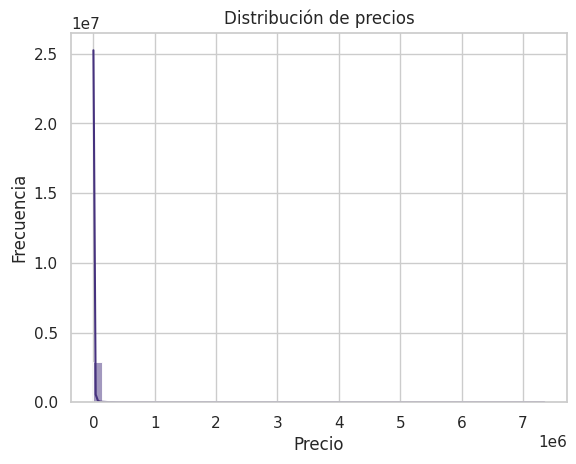

In [78]:

# Distribución de precios

sns.histplot(producto['productos_precio_lista'].dropna(), bins=50, kde=True)
plt.title("Distribución de precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

En ese gráfico no puede verse nada por la gran dispersión de los datos. Con el objetivo de visualizar mejor la distribucion de los datos, graficamos la columna productos_precios del dataframe que no tiene los Outliers. Aprovechamos tambien para mostrar en el mismo gráfico la media y la mediana de ambos dataframes (con y sin ouliers).

**Impacto de valores outliers**

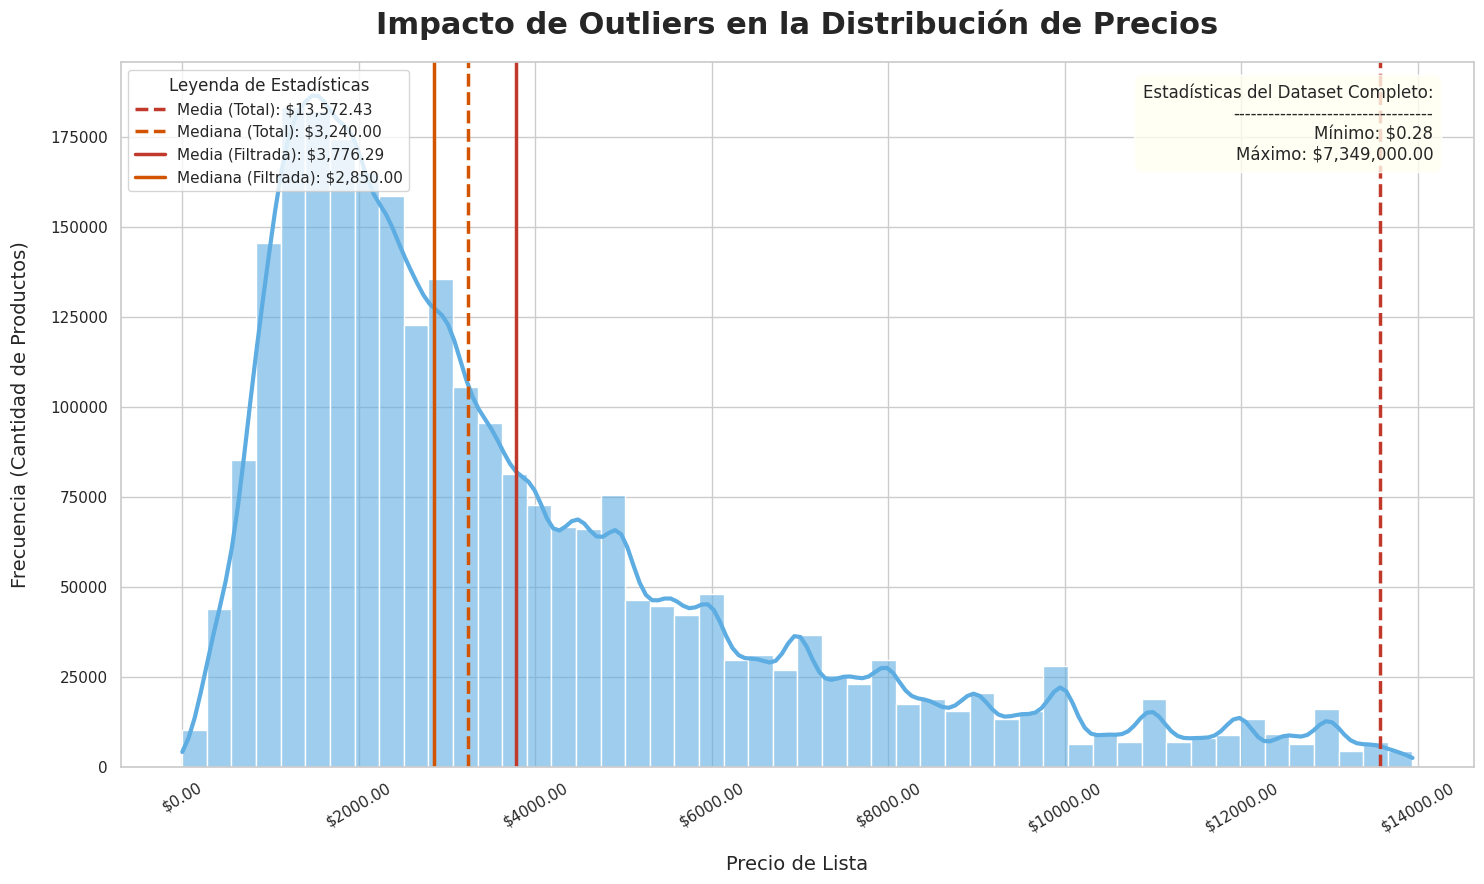

In [79]:
# 1. Definir la columna a graficar y analizar
columna_precio = 'productos_precio_lista'

# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="rocket")
plt.figure(figsize=(15, 9))

# 3. Graficar el histograma de los datos SIN outliers
ax = sns.histplot(
    data=producto_sin_outliers,
    x=columna_precio,
    bins=50,
    kde=True,
    color='#5dade2', # <-- ¡AQUÍ ESTÁ EL CAMBIO! Color celeste profesional
    alpha=0.6,
    line_kws={'linewidth': 3, 'color': '#2c3e50'}
)

# 4. Calcular y añadir las 4 líneas estadísticas
# --- Estadísticas del DataFrame COMPLETO (con outliers) ---
media_total = producto[columna_precio].mean()
mediana_total = producto[columna_precio].median()
plt.axvline(media_total, color='#c0392b', linestyle='--', linewidth=2.5, label=f'Media (Total): ${media_total:,.2f}')
plt.axvline(mediana_total, color='#d35400', linestyle='--', linewidth=2.5, label=f'Mediana (Total): ${mediana_total:,.2f}')

# --- Estadísticas del DataFrame FILTRADO (sin outliers) ---
media_filtrada = producto_sin_outliers[columna_precio].mean()
mediana_filtrada = producto_sin_outliers[columna_precio].median()
plt.axvline(media_filtrada, color='#c0392b', linestyle='-', linewidth=2.5, label=f'Media (Filtrada): ${media_filtrada:,.2f}')
plt.axvline(mediana_filtrada, color='#d35400', linestyle='-', linewidth=2.5, label=f'Mediana (Filtrada): ${mediana_filtrada:,.2f}')


# 5. Calcular Mín/Máx del DataFrame COMPLETO para el cuadro de texto
min_total = producto[columna_precio].min()
max_total = producto[columna_precio].max()
texto_estadisticas = (
    f"Estadísticas del Dataset Completo:\n"
    f"----------------------------------\n"
    f"Mínimo: ${min_total:,.2f}\n"
    f"Máximo: ${max_total:,.2f}"
)

# 6. Añadir el cuadro de texto
props = dict(boxstyle='round,pad=0.5', facecolor='ivory', alpha=0.8)
ax.text(0.97, 0.97, texto_estadisticas, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

# 7. Mejorar Títulos y Etiquetas
plt.title("Impacto de Outliers en la Distribución de Precios", fontsize=22, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=14, labelpad=15)
plt.ylabel("Frecuencia (Cantidad de Productos)", fontsize=14, labelpad=15)

# 8. Formatear el eje X para que parezca dinero
formatter = mticker.FormatStrFormatter('$%1.2f')
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=30)

# 9. Añadir una leyenda clara y bien ubicada
plt.legend(title='Leyenda de Estadísticas', fontsize=11, loc='upper left')

# 10. Ajustar el layout para que todo encaje
plt.tight_layout()

# 11. GUARDAR LA FIGURA EN UN ARCHIVO (antes de mostrarla)
plt.savefig('grafico_comparativo_precios.png', dpi=300, bbox_inches='tight')

# 12. Mostrar el gráfico en pantalla
plt.show()

# --- FIN DEL CÓDIGO DEL GRÁFICO ---

### Top marcas

¿Cuáles son las marcas con mas productos?

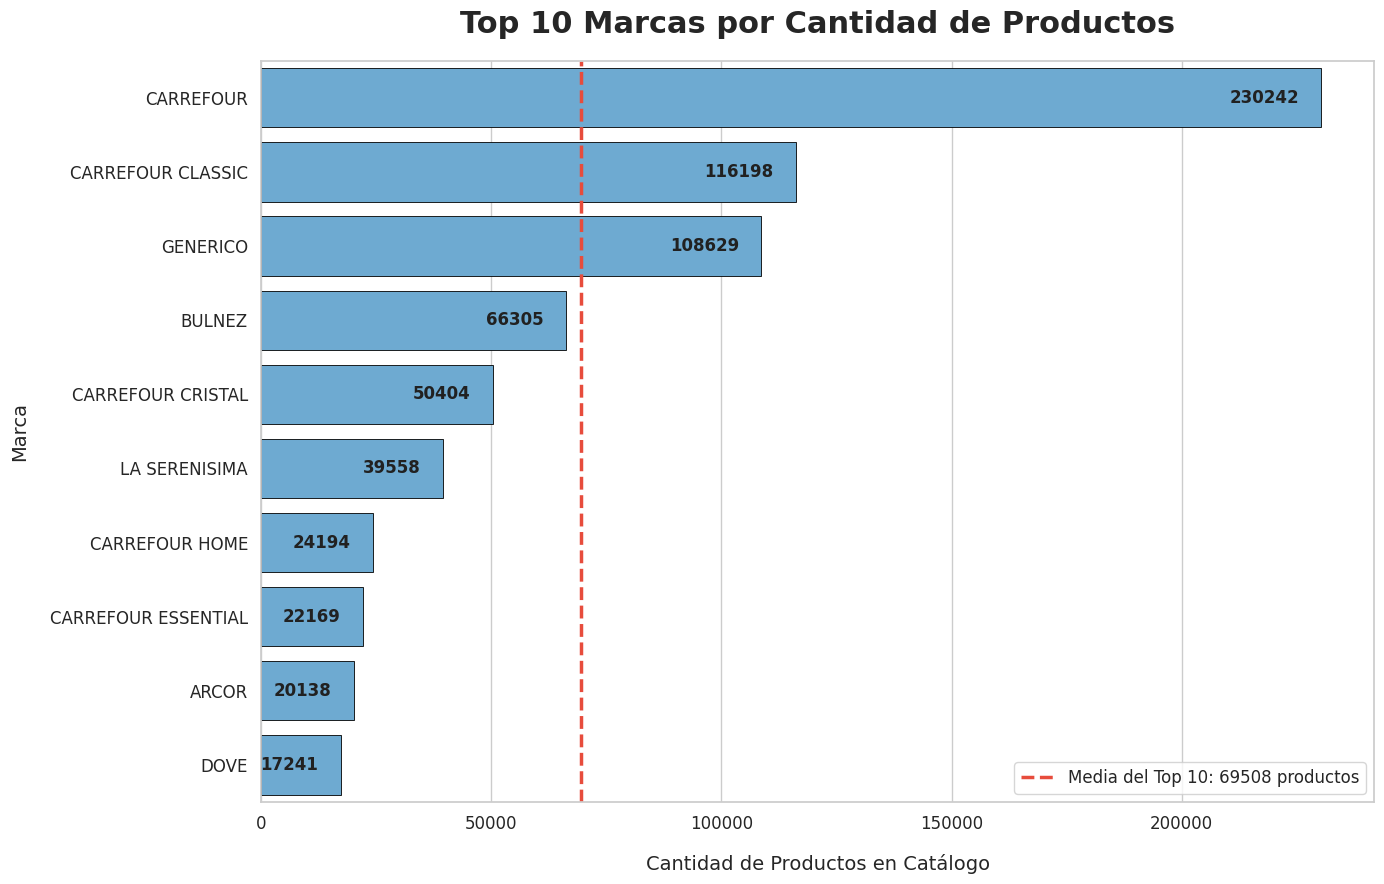

In [80]:
# 1. Preparar los datos
top_marcas = producto['productos_marca'].value_counts().head(10)

# 2. Calcular la media de productos para el Top 10 (la línea de referencia)
media_top10 = top_marcas.mean()

# 3. Establecer el tema y el tamaño de la figura
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 9))

# 4. Crear el gráfico de barras con el color celeste definido
ax = sns.barplot(
    x=top_marcas.values,
    y=top_marcas.index,
    color='#5dade2',  # <-- Color principal consistente con el gráfico anterior
    edgecolor='black',
    linewidth=0.6
)

# 5. Añadir la línea de la media con el color de acento rojo
ax.axvline(x=media_top10, color='#e74c3c', linestyle='--', linewidth=2.5,
            label=f'Media del Top 10: {media_top10:.0f} productos')

# 6. Añadir etiquetas de datos a las barras
#    Usaremos texto oscuro ya que el color de la barra es claro
for p in ax.patches:
    width = p.get_width()
    ax.text(width - (ax.get_xlim()[1] * 0.02), # Posición X (un 2% desde el borde)
            p.get_y() + p.get_height() / 2,
            f'{int(width)}',
            ha='right',
            va='center',
            fontsize=12,
            color='#212121', # Un negro no tan intenso, muy legible
            weight='bold')

# 7. Títulos y Etiquetas con el mismo estilo profesional
plt.title("Top 10 Marcas por Cantidad de Productos", fontsize=22, pad=20, weight='bold')
plt.xlabel("Cantidad de Productos en Catálogo", fontsize=14, labelpad=15)
plt.ylabel("Marca", fontsize=14, labelpad=15)

# 8. Ajustar los ticks de los ejes para mejor legibilidad
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 9. Añadir la leyenda para explicar la línea roja
plt.legend(fontsize=12, loc='lower right') # Mover a la esquina inferior derecha

# 10. Ajustar el layout para que todo encaje
plt.tight_layout()

# 11. GUARDAR la figura en un archivo
plt.savefig('top_10_marcas_estilo_consistente.png', dpi=300, bbox_inches='tight')

# 12. Mostrar el gráfico
plt.show()

# --- FIN DEL CÓDIGO DEL GRÁFICO ---

**¿Y si no consideramos a la marca Carrefour?**

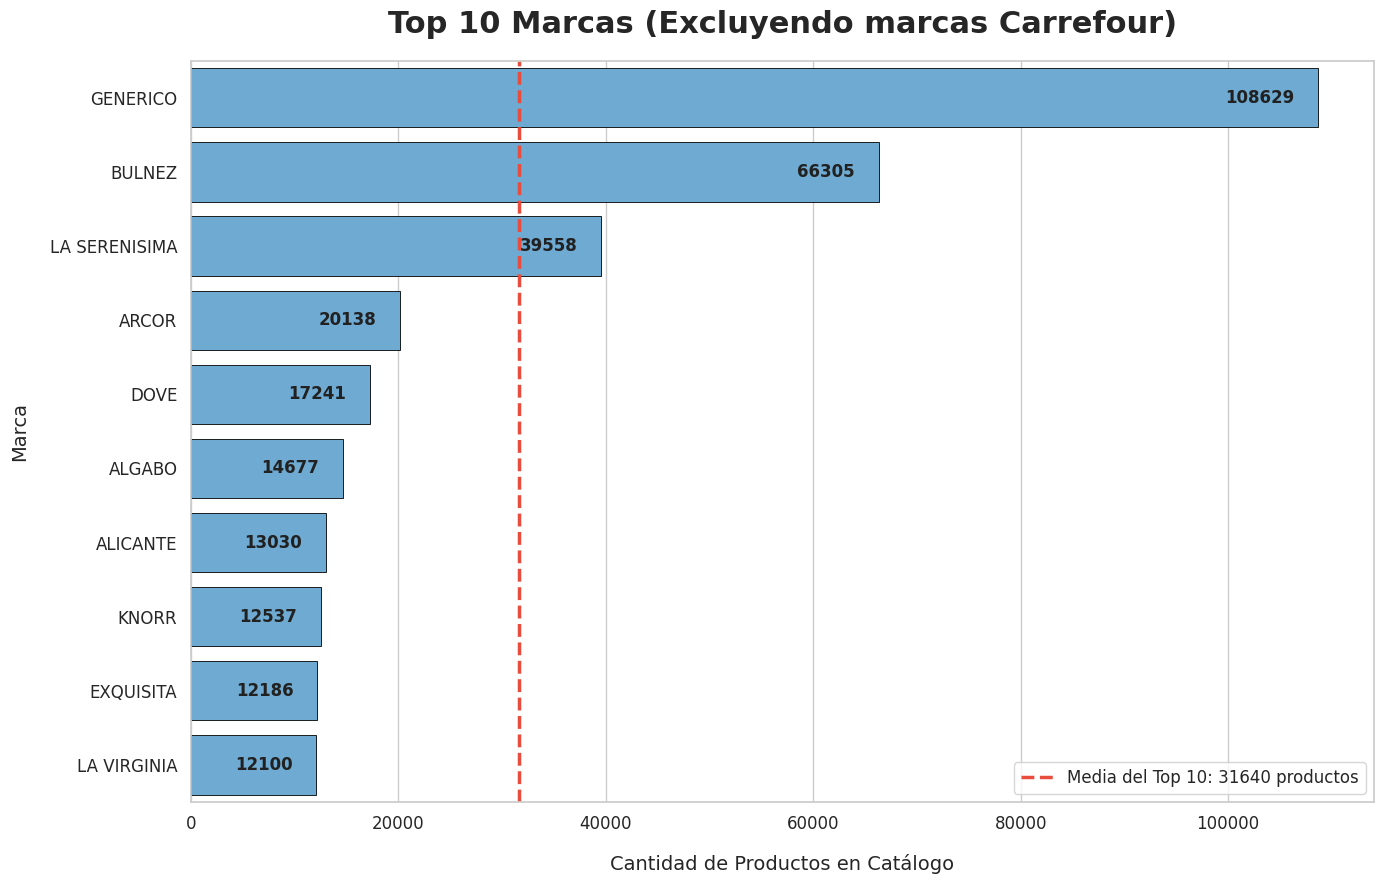

In [81]:


# --- INICIO DEL CÓDIGO ---

# 1. FILTRAR EL DATAFRAME
#    Crearemos un nuevo DataFrame llamado 'producto_filtrado'

# Condición 1: La marca NO debe ser 'S/D'.
filtro1 = producto['productos_marca'] != 'S/D'

# Condición 2: La marca NO debe contener 'CARREFOUR' (ignorando mayúsculas/minúsculas).
# El método .str.contains() es perfecto para esto.
# na=False asegura que los valores nulos (NaN) no den error y se traten como Falso.
filtro2 = ~producto['productos_marca'].str.contains('CARREFOUR', case=False, na=False)

# Aplicamos AMBOS filtros al DataFrame.
producto_filtrado = producto[filtro1 & filtro2]


# 2. PREPARAR LOS DATOS PARA EL GRÁFICO (usando el DataFrame filtrado)
top_marcas_filtrado = producto_filtrado['productos_marca'].value_counts().head(10)
media_top10_filtrado = top_marcas_filtrado.mean()


# 3. CREAR EL GRÁFICO (código idéntico en estilo al anterior)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 9))

ax = sns.barplot(
    x=top_marcas_filtrado.values,
    y=top_marcas_filtrado.index,
    color='#5dade2',
    edgecolor='black',
    linewidth=0.6
)

ax.axvline(x=media_top10_filtrado, color='#e74c3c', linestyle='--', linewidth=2.5,
            label=f'Media del Top 10: {media_top10_filtrado:.0f} productos')

for p in ax.patches:
    width = p.get_width()
    ax.text(width - (ax.get_xlim()[1] * 0.02),
            p.get_y() + p.get_height() / 2,
            f'{int(width)}',
            ha='right',
            va='center',
            fontsize=12,
            color='#212121',
            weight='bold')

# Cambiamos el título para reflejar el filtrado
plt.title("Top 10 Marcas (Excluyendo marcas Carrefour)", fontsize=22, pad=20, weight='bold')
plt.xlabel("Cantidad de Productos en Catálogo", fontsize=14, labelpad=15)
plt.ylabel("Marca", fontsize=14, labelpad=15)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()

# GUARDAR con un nombre de archivo diferente
plt.savefig('top_10_marcas_filtrado_carrefour.png', dpi=300, bbox_inches='tight')

plt.show()

# --- FIN DEL CÓDIGO ---

**Comparativa de precios maximos y promedios entre las 10 sucursales con precios mas altos y las 10 con precios mas bajos**

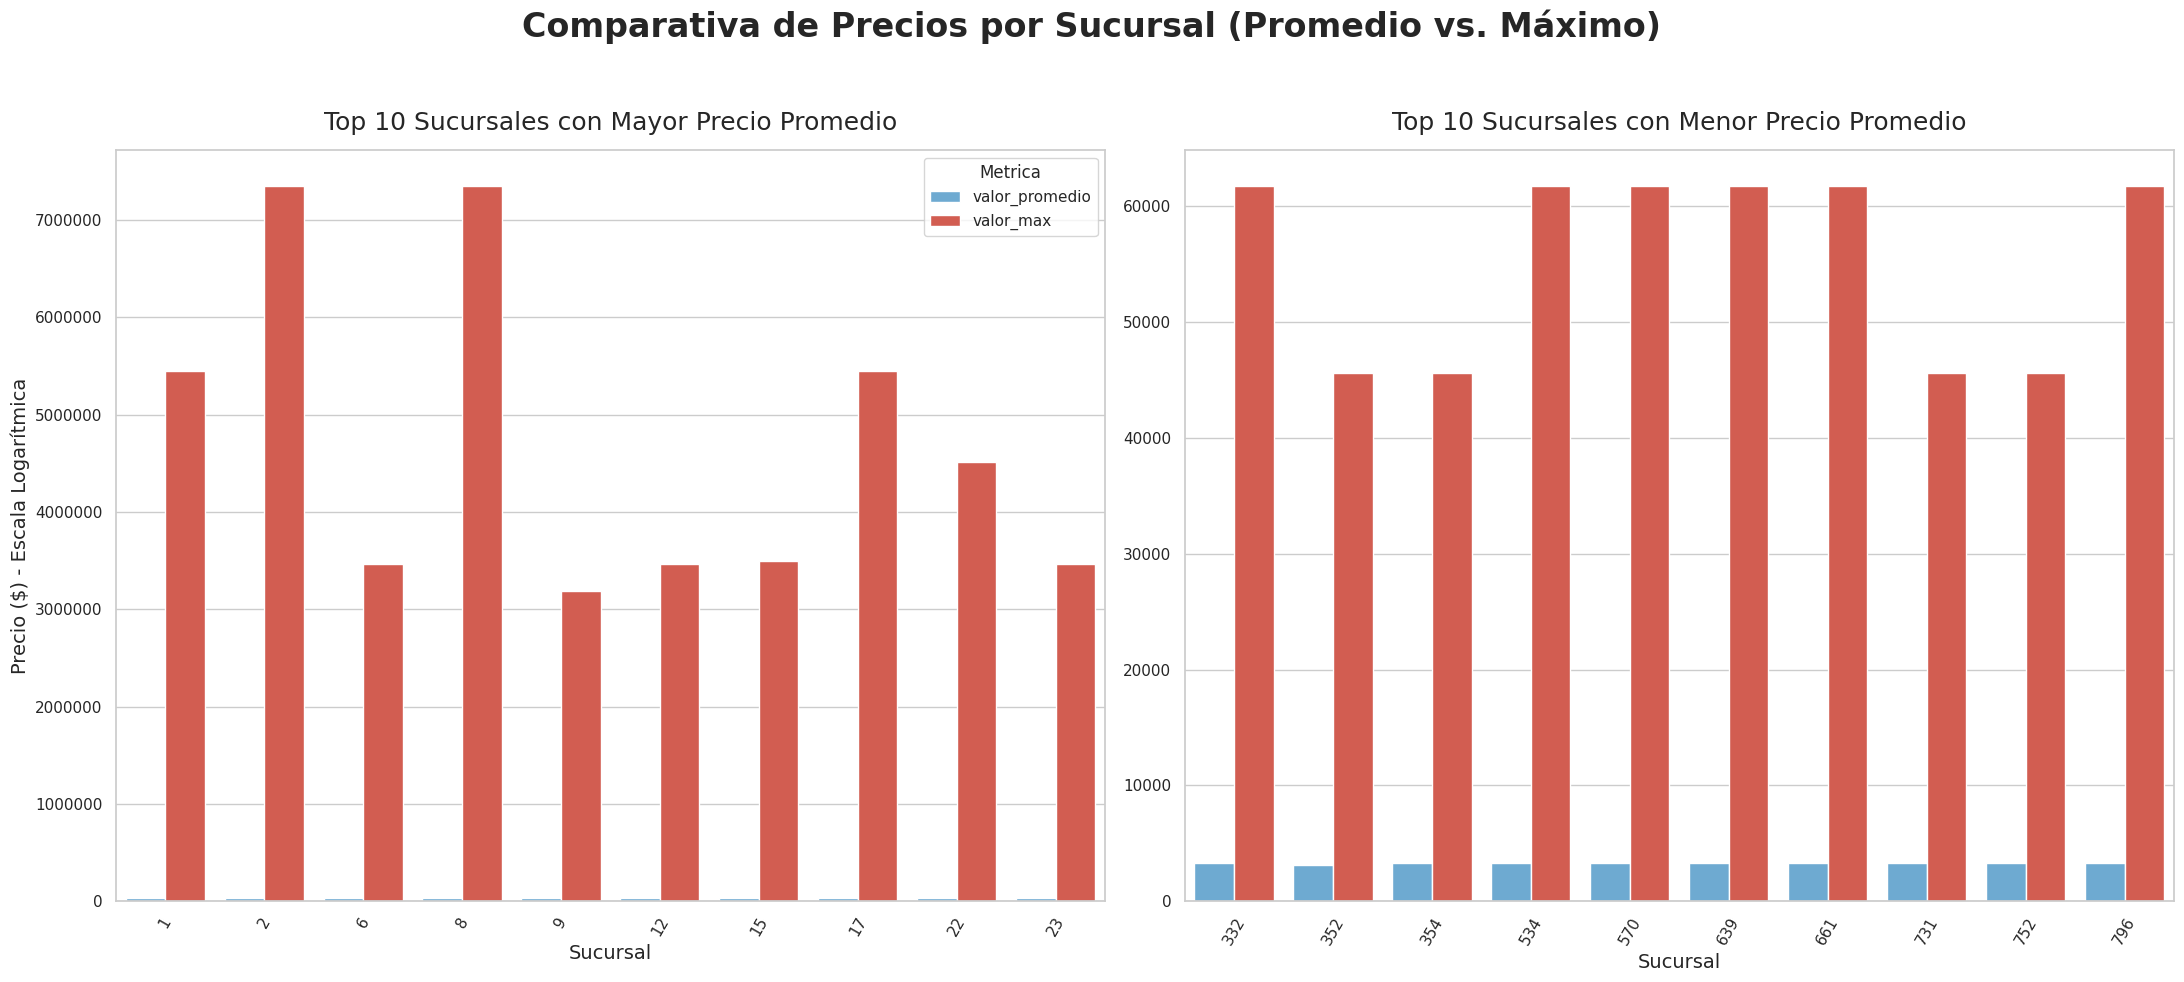

In [82]:
# Por sucursal:

# PASO 1: Agrupar por sucursal y calcular las estadísticas.
#print("Paso 1: Agrupando datos...")
sucursal_stats = producto.groupby('id_sucursal')['productos_precio_lista'].agg(
    valor_promedio='mean',
    valor_max='max'
).reset_index()


# PASO 2: Crear los dos DataFrames separados: Top 10 y Bottom 10.
#print("Paso 2: Creando los DataFrames Top 10 y Bottom 10...")
top_10_caros = sucursal_stats.nlargest(10, 'valor_promedio')
top_10_baratos = sucursal_stats.nsmallest(10, 'valor_promedio')


# PASO 3: Preparar los datos para un gráfico de barras agrupado.
# Usamos pd.melt() para transformar las columnas 'valor_promedio' y 'valor_max' en filas.
top_10_caros_long = pd.melt(top_10_caros, id_vars='id_sucursal', value_vars=['valor_promedio', 'valor_max'], var_name='Metrica', value_name='Precio')
top_10_baratos_long = pd.melt(top_10_baratos, id_vars='id_sucursal', value_vars=['valor_promedio', 'valor_max'], var_name='Metrica', value_name='Precio')


# PASO 4: Crear la figura con DOS subplots.
#print("Paso 3: Creando los gráficos...")
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
fig.suptitle("Comparativa de Precios por Sucursal (Promedio vs. Máximo)", fontsize=24, weight='bold')


# --- GRÁFICO IZQUIERDO: TOP 10 MÁS CARAS ---
ax_izq = axes[0]
sns.barplot(
    data=top_10_caros_long,
    x='id_sucursal',
    y='Precio',
    hue='Metrica', # Esto crea las barras agrupadas
    palette={'valor_promedio': '#5dade2', 'valor_max': '#e74c3c'},
    ax=ax_izq
)
ax_izq.set_title('Top 10 Sucursales con Mayor Precio Promedio', fontsize=18, pad=15)
ax_izq.set_xlabel('Sucursal', fontsize=14)
ax_izq.set_ylabel('Precio ($) - Escala Logarítmica', fontsize=14)


# --- GRÁFICO DERECHO: TOP 10 MÁS BARATAS ---
ax_der = axes[1]
sns.barplot(
    data=top_10_baratos_long,
    x='id_sucursal',
    y='Precio',
    hue='Metrica',
    palette={'valor_promedio': '#5dade2', 'valor_max': '#e74c3c'},
    ax=ax_der
)
ax_der.set_title('Top 10 Sucursales con Menor Precio Promedio', fontsize=18, pad=15)
ax_der.set_xlabel('Sucursal', fontsize=14)
ax_der.set_ylabel('') # No repetir la etiqueta del eje Y
ax_der.get_legend().remove() # Quitar leyenda duplicada


# --- !! LA SOLUCIÓN AL PROBLEMA DE ESCALA: ESCALA LOGARÍTMICA !! ---
# Aplicamos esto a AMBOS gráficos.
#ax_izq.set_yscale('log')
#ax_der.set_yscale('log')


# --- PASO 5: Mejoras finales y guardado ---

# Formatear el eje Y de ambos gráficos para que los números no estén en notación científica.
formatter = mticker.ScalarFormatter()
formatter.set_scientific(False)
ax_izq.yaxis.set_major_formatter(formatter)
ax_der.yaxis.set_major_formatter(formatter)

# Rotar las etiquetas del eje X en ambos gráficos para legibilidad.
ax_izq.tick_params(axis='x', rotation=60)
ax_der.tick_params(axis='x', rotation=60)

# Ajustar layout y guardar
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('grafico_barras_agrupado_final.png', dpi=300)
plt.show()



**Distribución de porcentajes de descuentos**

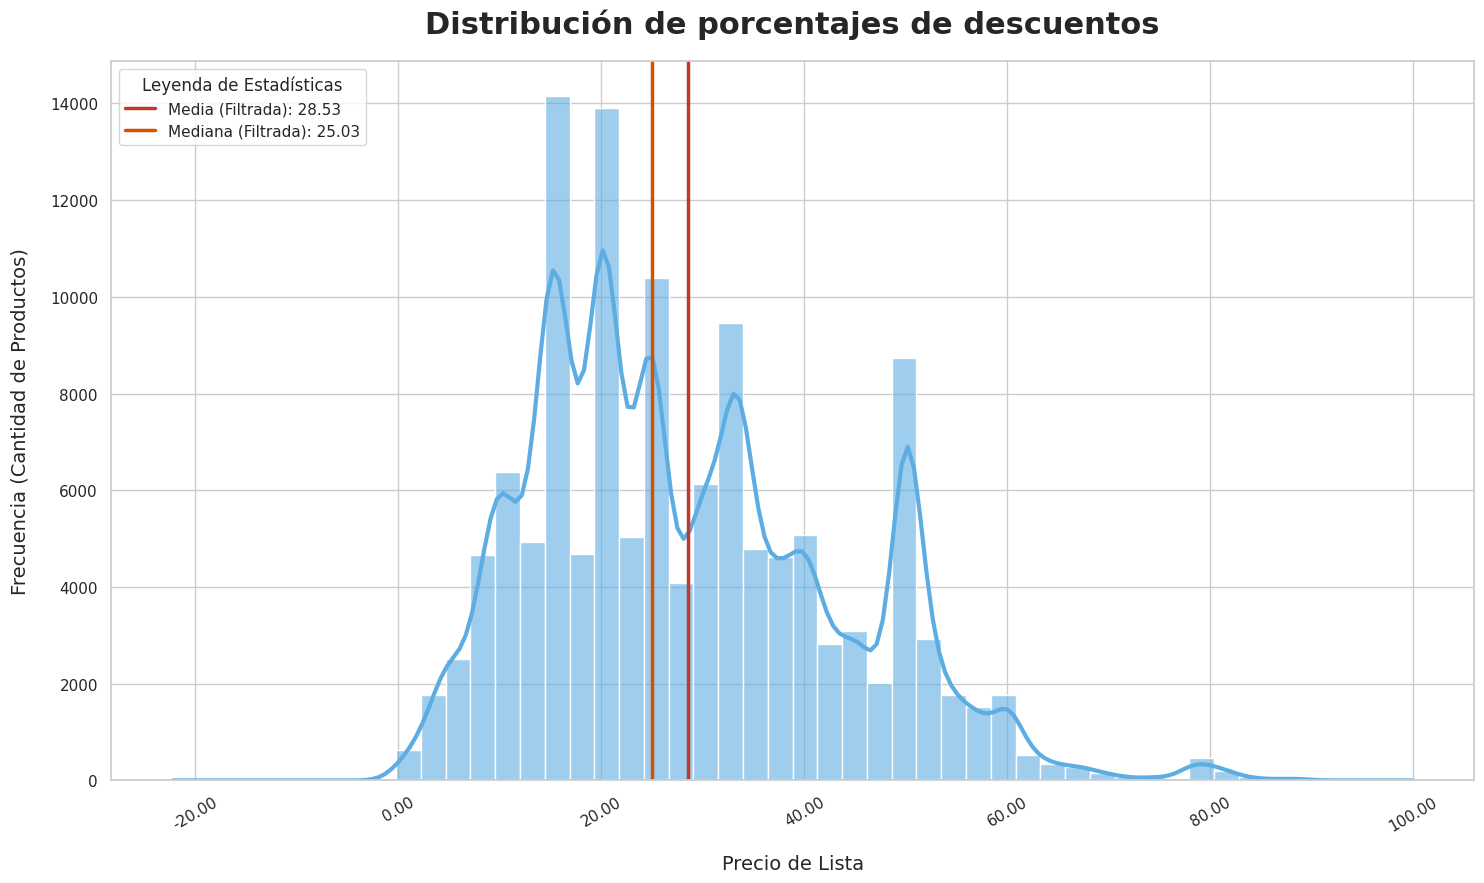

In [83]:


# 1. Definir la columna a graficar y analizar
columna_precio = 'descuento'

# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="rocket")
plt.figure(figsize=(15, 9))

# 3. Graficar el histograma de los datos SIN outliers
ax = sns.histplot(
    data=promociones,
    x=columna_precio,
    bins=50,
    kde=True,
    color='#5dade2', # <-- ¡AQUÍ ESTÁ EL CAMBIO! Color celeste profesional
    alpha=0.6,
    line_kws={'linewidth': 3, 'color': '#2c3e50'}
)

# --- Estadísticas del DataFrame FILTRADO (sin outliers) ---
media_filtrada = promociones[columna_precio].mean()
mediana_filtrada = promociones[columna_precio].median()
plt.axvline(media_filtrada, color='#c0392b', linestyle='-', linewidth=2.5, label=f'Media (Filtrada): {media_filtrada:,.2f}')
plt.axvline(mediana_filtrada, color='#d35400', linestyle='-', linewidth=2.5, label=f'Mediana (Filtrada): {mediana_filtrada:,.2f}')


# 5. Calcular Mín/Máx del DataFrame COMPLETO para el cuadro de texto
min_total = promociones[columna_precio].min()
max_total = promociones[columna_precio].max()
texto_estadisticas = (
    f"Estadísticas del Dataset Completo:\n"
    f"----------------------------------\n"
    f"Mínimo: {min_total:,.2f}\n"
    f"Máximo: {max_total:,.2f}"
)

# 6. Añadir el cuadro de texto
#props = dict(boxstyle='round,pad=0.5', facecolor='ivory', alpha=0.8)
#ax.text(0.97, 0.97, texto_estadisticas, transform=ax.transAxes, fontsize=12,
        #verticalalignment='top', horizontalalignment='right', bbox=props)

# 7. Mejorar Títulos y Etiquetas
plt.title("Distribución de porcentajes de descuentos", fontsize=22, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=14, labelpad=15)
plt.ylabel("Frecuencia (Cantidad de Productos)", fontsize=14, labelpad=15)

# 8. Formatear el eje X para que parezca dinero
formatter = mticker.FormatStrFormatter('%1.2f')
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=30)

# 9. Añadir una leyenda clara y bien ubicada
plt.legend(title='Leyenda de Estadísticas', fontsize=11, loc='upper left')

# 10. Ajustar el layout para que todo encaje
plt.tight_layout()

# 11. GUARDAR LA FIGURA EN UN ARCHIVO (antes de mostrarla)
plt.savefig('grafico_comparativo_precios.png', dpi=300, bbox_inches='tight')

# 12. Mostrar el gráfico en pantalla
plt.show()

**Comparativa de distribucion de descuentos segun tipo de comercio (Express, Hiper y Market)**

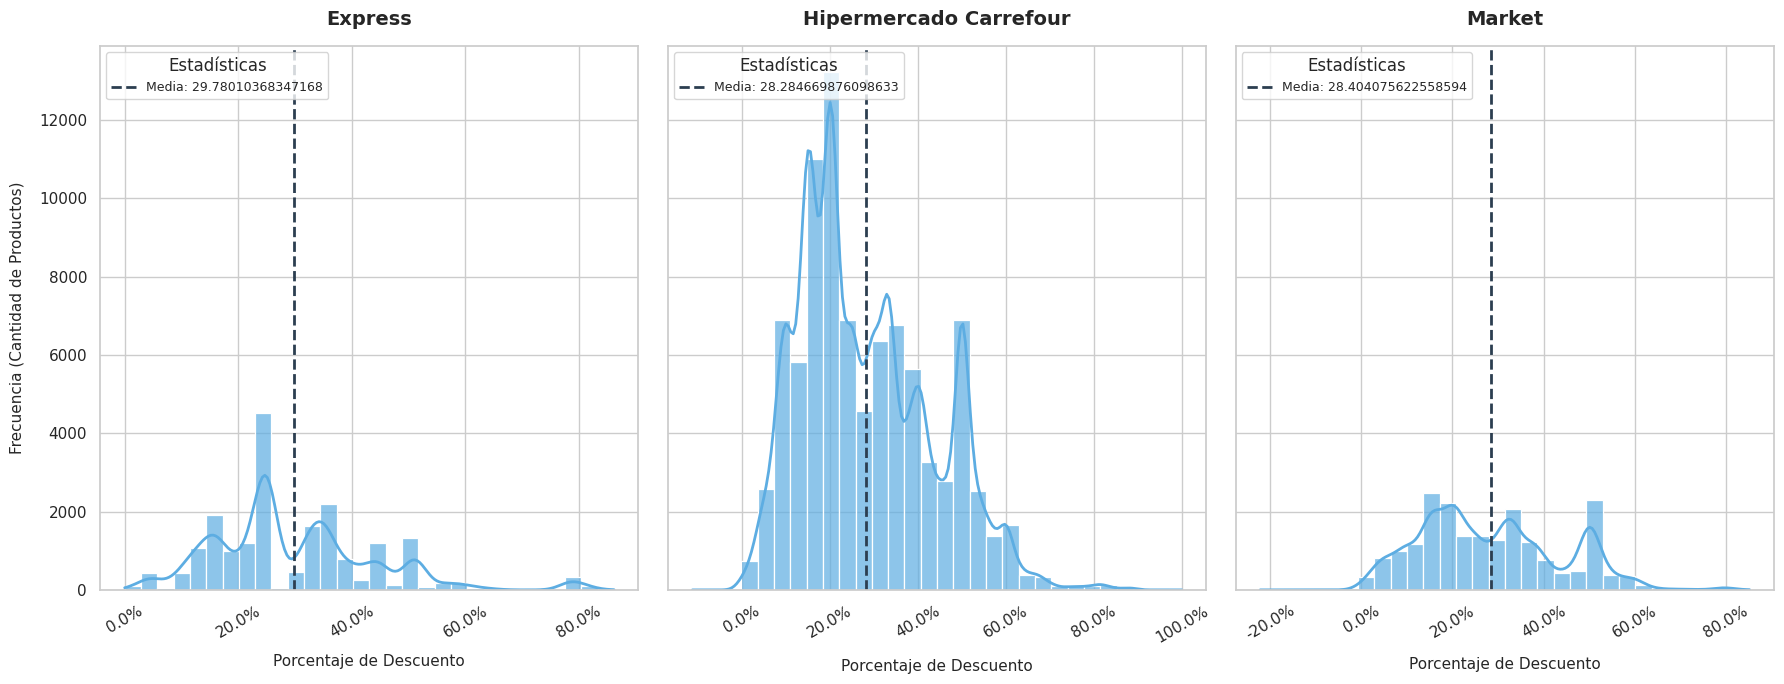

In [84]:

# 1. Definir las columnas a utilizar
columna_descuento = 'descuento'
columna_agrupacion = 'comercio_bandera_nombre'

# Limpieza y obtención de nombres únicos de banderas
if columna_agrupacion in df.columns:
    df[columna_agrupacion] = df[columna_agrupacion].str.strip()
    nombres_banderas_unicas = sorted(df[columna_agrupacion].dropna().unique())
else:
    print(f"Error: La columna '{columna_agrupacion}' no se encuentra en el DataFrame.")
    exit()

n_plots = len(nombres_banderas_unicas)
if n_plots == 0:
    print(f"No hay datos válidos en la columna '{columna_agrupacion}' para graficar.")
    exit()

# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="rocket")
fig, axes = plt.subplots(1, n_plots, figsize=(18, 7), sharey=True)

if n_plots == 1:
    axes = [axes]

# 3. Graficar en cada subplot
for i, nombre_bandera_actual in enumerate(nombres_banderas_unicas):
    data_filtrada = df[df[columna_agrupacion] == nombre_bandera_actual].copy()

    ax = axes[i]

    # Graficar el histograma y la curva KDE
    sns.histplot(
        data=data_filtrada,
        x=columna_descuento,
        bins=30,
        kde=True,
        color='#5dade2',
        alpha=0.7,
        line_kws={'linewidth': 2, 'color': '#2c3e50'},
        ax=ax
    )

    # Calcular la media de descuento para el grupo actual
    media_descuento = data_filtrada[columna_descuento].mean()

    # Formatear la media para mostrarla
    media_formateada = f"{media_descuento}" # Formato de porcentaje con un decimal

    # Añadir una línea vertical para indicar la media
    ax.axvline(media_descuento, color='#2c3e50', linestyle='--', linewidth=2, label=f'Media: {media_formateada}')

    # Títulos y Etiquetas
    ax.set_title(f"{nombre_bandera_actual}", fontsize=14, pad=15, weight='bold')
    ax.set_xlabel("Porcentaje de Descuento", fontsize=11, labelpad=10)
    if i == 0:
        ax.set_ylabel("Frecuencia (Cantidad de Productos)", fontsize=11, labelpad=10)
    else:
        ax.set_ylabel("")

    # Formatear el eje X
    formatter = mticker.FormatStrFormatter('%.1f%%')
    ax.xaxis.set_major_formatter(formatter)
    ax.tick_params(axis='x', rotation=30)

    # 9. Añadir la leyenda específica para la media del subplot actual
    # El parámetro 'label' en ax.axvline se usa para crear la entrada de la leyenda
    ax.legend(title='Estadísticas', fontsize=9, loc='upper left') # Añadir leyenda por subplot


# Ajustar el layout general
plt.tight_layout()

# Guardar la figura (opcional)
# plt.savefig('distribucion_descuentos_con_media_por_bandera.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

Si observamos la media de descuento, podemos ver que en los tres tipos de comercio, son practicamente iguales. Como es de esperarse, en el hipermercado hay muchos mas productos en descuento y tiene una distribucion un poco mas aguda con menos dispersion. En todos los mercados la distribución tiene forma que se parece mas o menos a una normal.

Podemos ver que en todos los casos, hay una barra un poco mas alta que los demas valores en 50 %.

**Distribución de descuentos por provincias**

In [85]:
df['sucursales_provincia'].unique()

<StringArray>
['AR-E', 'AR-B', 'AR-C', 'AR-Q', 'AR-U', 'AR-M', 'AR-Z', 'AR-S', 'AR-X',
 'AR-K', 'AR-H', 'AR-W', 'AR-R', 'AR-J', 'AR-A', 'AR-T', 'AR-F', 'AR-V',
 'AR-L', 'AR-P', 'AR-D', 'AR-Y']
Length: 22, dtype: string

In [86]:
# La columna sucursales_provincia tiene utiliza códigos como AR-E, AR-B para indicar la provincia a la que pertenece cada comercio.
# Haremos una transformacion según la norma ISO 3166-2 para recuperar los nombres de las provincias
# esto es solo a modo de facilitar la interpretacion y la curiosidad del lector, pero no es importante desde el punto de vista informativo para la realización del modelo


mapeo_provincia_df = pd.DataFrame({
    'sucursales_provincia': ['AR-A', 'AR-B', 'AR-C', 'AR-D', 'AR-E', 'AR-F', 'AR-G', 'AR-H',
                             'AR-J', 'AR-K', 'AR-L', 'AR-M', 'AR-N', 'AR-O', 'AR-P', 'AR-Q',
                             'AR-R', 'AR-S', 'AR-T', 'AR-U', 'AR-V', 'AR-X', 'AR-Y', 'AR-Z'],
    'nombre_provincia_completo': ['Salta', 'Buenos Aires', 'CABA', 'San Luis', 'Entre Ríos', 'Formosa', 'Santiago del Estero', 'Chaco',
                                  'Jujuy', 'Catamarca', 'La Pampa', 'Mendoza', 'Misiones', 'La Rioja', 'Misiones', 'Neuquén', # AR-P=Misiones
                                  'Río Negro', 'Santa Fe', 'Corrientes', 'Chubut', 'Tierra del Fuego', 'Córdoba', 'Tucumán', 'Santa Cruz']
})

# Luego, fusionamos este mapeo con df:
df = df.merge(mapeo_provincia_df, on='sucursales_provincia', how='left')


columna_agrupacion = 'nombre_provincia_completo'


/tmp/ipython-input-186953596.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


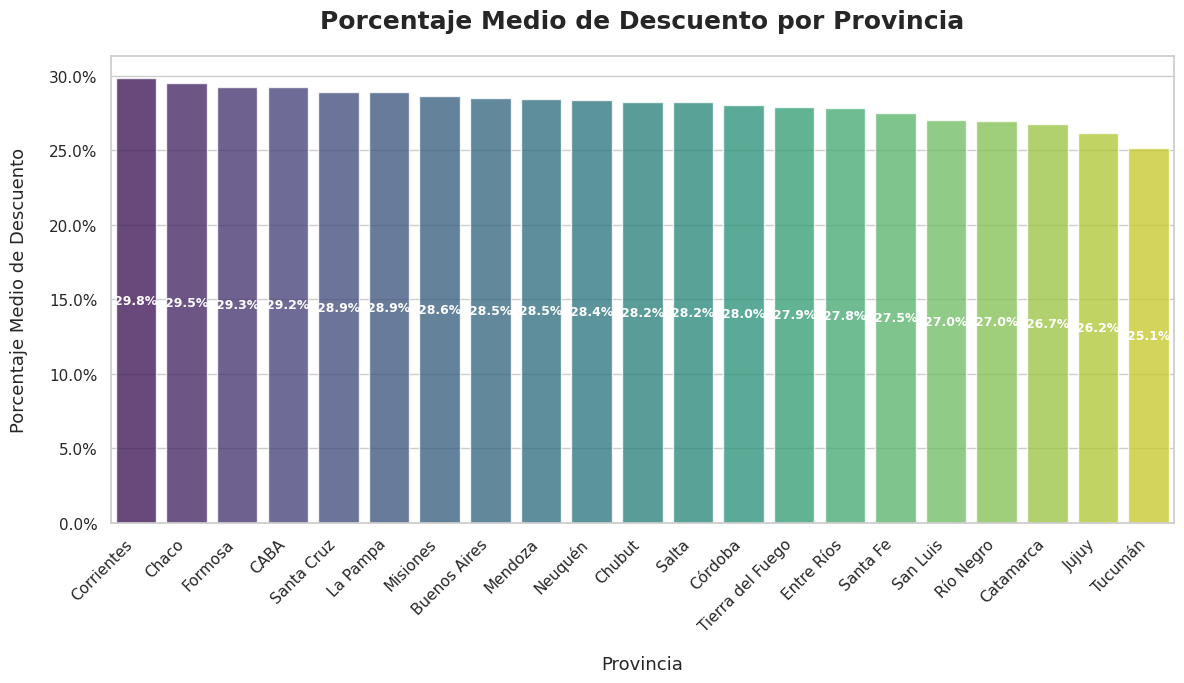

In [87]:


# 1. Definir las columnas relevantes
columna_descuento = 'descuento'
columna_agrupacion = 'nombre_provincia_completo'

# Limpieza de la columna de agrupación y obtención de las provincias únicas
if columna_agrupacion in df.columns:
    # Eliminar espacios en blanco alrededor de los nombres de provincia
    df[columna_agrupacion] = df[columna_agrupacion].str.strip()

    # Eliminar filas donde la provincia o el descuento sean NaN
    df_cleaned = df.dropna(subset=[columna_descuento, columna_agrupacion]).copy()

    # Obtener las provincias únicas y ordenarlas alfabéticamente
    provincias_unicas = sorted(df_cleaned[columna_agrupacion].unique())
else:
    print(f"Error: La columna '{columna_agrupacion}' no se encuentra en el DataFrame.")
    exit()

if not provincias_unicas:
    print(f"No hay datos válidos en la columna '{columna_agrupacion}' para graficar.")
    exit()

# 2. Agrupar por provincia y calcular la media de descuento
# Dado que el descuento ya va de 0 a 100, la media se calcula directamente.
df_media_por_provincia = df_cleaned.groupby(columna_agrupacion)[columna_descuento].mean().reset_index()

# Ordenar el resultado por la media de descuento para una mejor visualización
df_media_por_provincia = df_media_por_provincia.sort_values(by=columna_descuento, ascending=False)

# 3. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="viridis") # Cambié palette para que combine con el gráfico de barras
plt.figure(figsize=(12, 7))

# 4. Graficar el barplot usando los datos agrupados
ax = sns.barplot(
    data=df_media_por_provincia,
    x=columna_agrupacion,
    y=columna_descuento,
    order=df_media_por_provincia[columna_agrupacion],
    palette="viridis",
    alpha=0.8,
    errorbar=None
)

# 5. Añadir Títulos y Etiquetas
plt.title("Porcentaje Medio de Descuento por Provincia", fontsize=18, pad=20, weight='bold')
plt.xlabel("Provincia", fontsize=13, labelpad=15)
plt.ylabel("Porcentaje Medio de Descuento", fontsize=13, labelpad=15)

# 6. Formatear el eje Y para que muestre porcentajes correctamente (0-100)
# Usamos FuncFormatter para mayor control, ya que el Label es directamente el valor
formatter = mticker.FuncFormatter(lambda y, _: '{:.1f}%'.format(y))
ax.yaxis.set_major_formatter(formatter)

# Rotar las etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=11)

# 7. Añadir los valores de la media encima de cada barra
for container in ax.containers:
    # Formatear la altura de la barra como porcentaje con un decimal
    labels = [f'{h.get_height():.1f}%' for h in container.get_children()]
    ax.bar_label(container, labels=labels, label_type='center', color='white', fontsize=9, weight='bold')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

No es tan visible una diferencia entre porcentajes de descuentos promedio entre provincias.

**Scatter plot entre precio de lista y porcentaje de descuento**

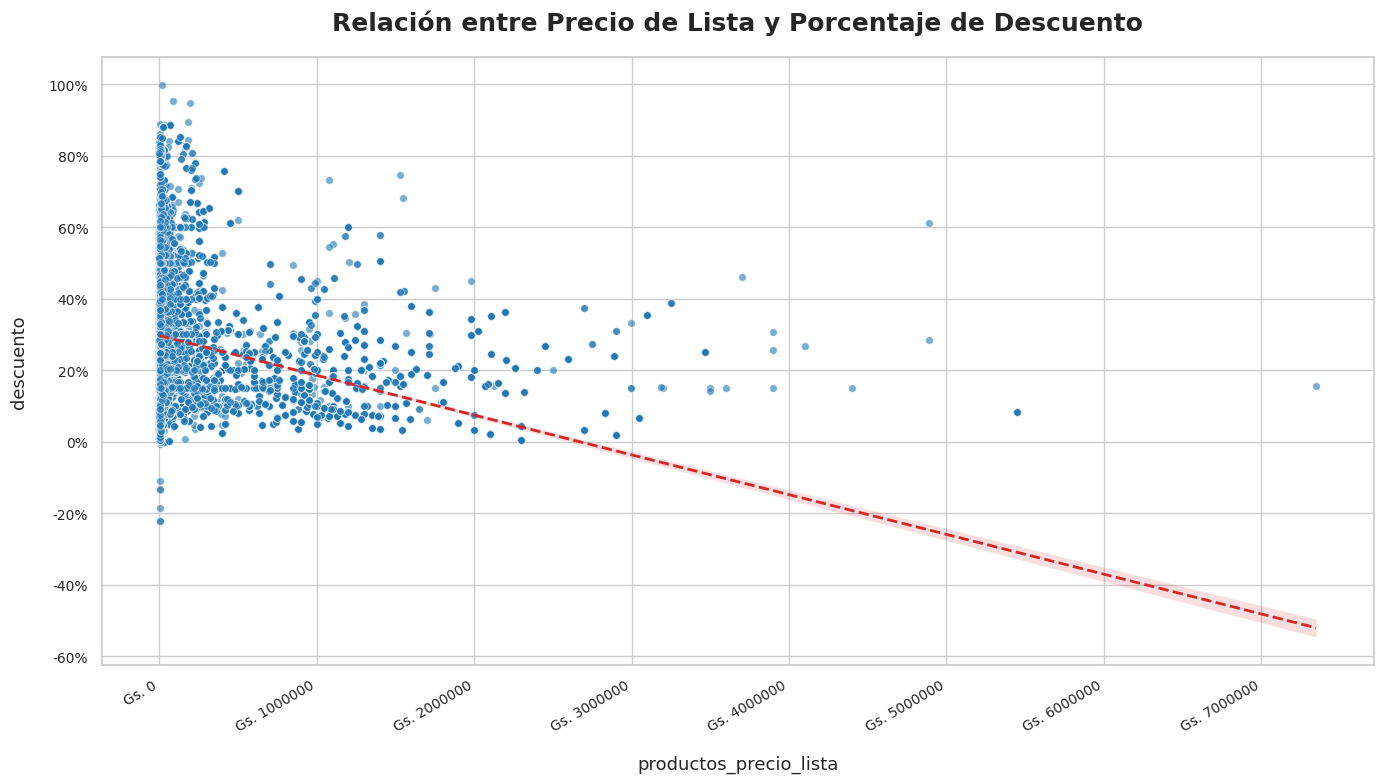

In [88]:


# 1. Definir las columnas para el scatter plot
columna_precio = 'productos_precio_lista'
columna_descuento = 'descuento'


df_plot = df.dropna(subset=[columna_precio, columna_descuento]).copy()


# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="viridis") # Un palette agradable para los puntos
plt.figure(figsize=(14, 8))

# 3. Crear el scatter plot
# Usamos scatterplot de seaborn, que permite más opciones que matplotlib.pyplot.scatter
ax = sns.scatterplot(
    data=df_plot,
    x=columna_precio,
    y=columna_descuento,
    alpha=0.6,       # Transparencia para ver densidad de puntos
    s=30,            # Tamaño de los puntos
    color='#1f77b4', # Un color azul consistente (puedes cambiarlo o usar palette)
    edgecolor='w',   # Borde blanco para los puntos
    linewidth=0.5
)

# 4. Títulos y Etiquetas
plt.title("Relación entre Precio de Lista y Porcentaje de Descuento", fontsize=18, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=13, labelpad=15)
plt.ylabel("Porcentaje de Descuento", fontsize=13, labelpad=15)

# 5. Formatear los ejes para mejor legibilidad
# Formato de moneda para el eje X (Precio de Lista)
# Puedes ajustar el símbolo y el formato según tus necesidades (ej: '$' o '€')
price_formatter = mticker.FormatStrFormatter('Gs. %.0f') # Si los precios son enteros, '%.0f'
ax.xaxis.set_major_formatter(price_formatter)

# Formato de porcentaje para el eje Y (Descuento)
discount_formatter = mticker.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)) # Sin decimales si es 0-100
ax.yaxis.set_major_formatter(discount_formatter)

# Rotar etiquetas del eje X si es necesario (raro para precios, pero puede ser útil)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)


# 6. Añadir una línea de regresión (opcional pero muy útil para scatter plots)
# Esto mostrará la tendencia lineal general entre las dos variables.
sns.regplot(
    data=df_plot,
    x=columna_precio,
    y=columna_descuento,
    scatter=False, # No queremos que regplot dibuje los puntos de nuevo
    color='#d62728', # Color para la línea de regresión
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

# 7. Añadir una pequeña leyenda para la línea de regresión (si se añadió)
# Si el regplot no genera una leyenda automáticamente, puedes añadirla manualmente
# ax.plot([], [], color='#d62728', linestyle='--', linewidth=2, label='Tendencia Lineal')
# ax.legend(title='Tendencia', loc='upper left', fontsize=10)


# 8. Ajustar el layout
plt.tight_layout()

# 9. Mostrar el gráfico
plt.show()

No vemos una tendencia marcada en la relacion entre porcentaje de descuento y precio de lista (al menos graficando todos los valores).

A continuacion veremos el mismo gráfico pero para valores menores al Límite superior 13939 considerando el rango calculado mas arriba.

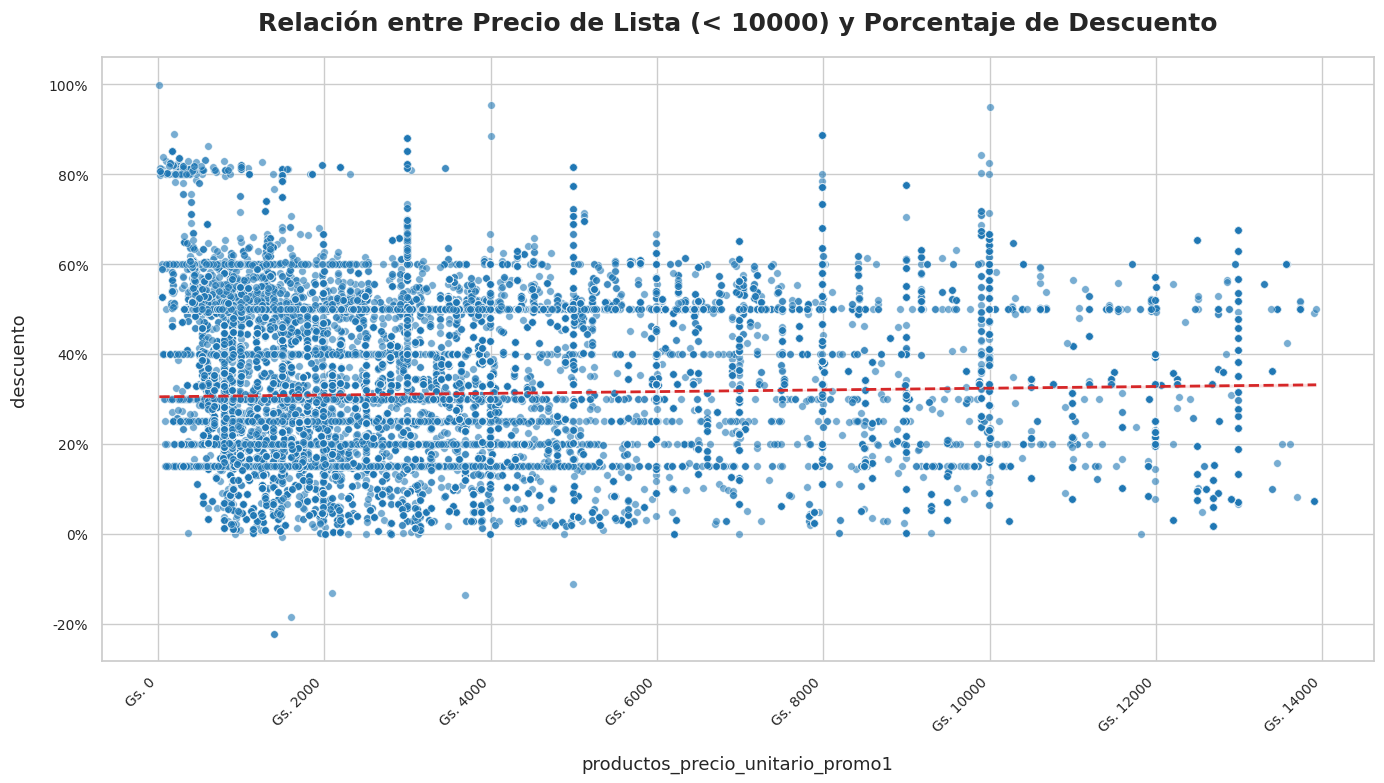

In [89]:


# 1. Definir las columnas
columna_precio = 'productos_precio_unitario_promo1'
columna_descuento = 'descuento'

# Verificar que las columnas existan
if columna_precio not in df.columns or columna_descuento not in df.columns:
    print(f"Error: Una o ambas columnas ('{columna_precio}', '{columna_descuento}') no se encuentran en el DataFrame.")
    exit()

# 2. Filtrar el DataFrame para incluir solo precios menores a 10000
# Usamos .loc para una selección basada en la condición
df_filtrado_precio = df.loc[df[columna_precio] < 13939].copy()

# Limpiar datos del DataFrame filtrado (eliminar NaN en las columnas de interés)
df_filtrado_precio = df_filtrado_precio.dropna(subset=[columna_precio, columna_descuento]).copy()

# Verificar si quedan datos después del filtrado
if df_filtrado_precio.empty:
    print("No hay datos con precios menores a 10000 para graficar después de limpiar NaN.")
    exit()

# 3. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="viridis")
plt.figure(figsize=(14, 8))

# 4. Crear el scatter plot con los datos filtrados
ax = sns.scatterplot(
    data=df_filtrado_precio, # Usamos el DataFrame filtrado
    x=columna_precio,
    y=columna_descuento,
    alpha=0.6,
    s=30,
    color='#1f77b4',
    edgecolor='w',
    linewidth=0.5
)

# 5. Títulos y Etiquetas
plt.title("Relación entre Precio de Lista (< 10000) y Porcentaje de Descuento", fontsize=18, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=13, labelpad=15)
plt.ylabel("Porcentaje de Descuento", fontsize=13, labelpad=15)

# 6. Formatear los ejes
# Eje X (Precio de Lista): Formato de moneda, sin decimales.
price_formatter = mticker.FormatStrFormatter('Gs. %.0f')
ax.xaxis.set_major_formatter(price_formatter)

# Eje Y (Descuento): Formato de porcentaje.
discount_formatter = mticker.FuncFormatter(lambda y, _: '{:.0f}%'.format(y))
ax.yaxis.set_major_formatter(discount_formatter)

# Rotar etiquetas del eje X si es necesario
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# 7. Añadir una línea de regresión (opcional pero útil)
# NOTA: La línea de regresión se calculará y mostrará SOLO para los datos filtrados (< 10000)
sns.regplot(
    data=df_filtrado_precio, # Importante usar el DataFrame filtrado aquí también
    x=columna_precio,
    y=columna_descuento,
    scatter=False,
    color='#d62728',
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

# 8. Ajustar el layout
plt.tight_layout()

# 9. Mostrar el gráfico
plt.show()

Puede verse que los porcentajes de descuentos suelen darse a valores redondos, por ejemplo 15, 20, 25, 30, 40, 50, 60, etc.

## Parte 3 - Planteo de un problema supervisado de Machine Learning

# Análisis y Predicción de la Diferencia de Precio con Promoción

Este notebook realiza un análisis exploratorio del dataset `productos.csv` y entrena un modelo de Regresión Lineal
para predecir la diferencia de precio entre el precio de lista y el precio con promoción 1.

**Variable target:** `productos_precio_lista - productos_precio_unitario_promo1`


In [90]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [91]:

# Cargar datos


# Filtrar registros válidos para el cálculo del porcentaje de diferencia
producto = producto[(producto["productos_precio_lista"].notna()) &
        (producto["productos_precio_unitario_promo1"].notna()) &
        (producto["productos_precio_lista"] != 0)]

# Crear columna target: diferencia porcentual
producto["diferencia_precio"] = (producto["productos_precio_lista"] - producto["productos_precio_unitario_promo1"]) / producto["productos_precio_lista"]

# Vista previa
producto.head()


/tmp/ipython-input-885073954.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto["diferencia_precio"] = (producto["productos_precio_lista"] - producto["productos_precio_unitario_promo1"]) / producto["productos_precio_lista"]


,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,diferencia_precio
49,1,240,7798422850978,SERVILLETAS RAYAS PLATA X20 UDS MESA HOGAR,UNI,GENERICO,3790.0,3.790000e+03,1,UNI,2190.00,Promo A valida desde el 23/04/2025 hasta 30/06...,0.422164
111,1,2,7791398072535,MAMADERA SILICONA 140 ML FR 6M,UNI,<NA>,8590.0,8.590000e+03,1,UNI,3990.00,Promo A valida desde el 01/06/2025 hasta 01/08...,0.535506
120,1,239,3615004514896,CARGADOR CELULAR POSS 5W BLANCO PSWC 1AWH 18,UNI,<NA>,9900.0,9.900000e+03,1,UNI,4950.00,Promo A valida desde el 24/06/2025 hasta 30/06...,0.500000
195,3,341,7790310985274,PALITOS DE MAIZ QUESO CHEETOS X 43 GRS,UNI,CHEETOS,1685.0,3.918600e+03,43,GRS,1432.25,Promo A valida desde el 24/06/2025 hasta 30/06...,0.150000
218,1,157,7797087510340,AIRE SPLIT SURREY 3430W 553GFQ1201F,UNI,SURREY,1049000.0,1.049000e+06,1,UNI,950000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,0.094376


## Exploración de la variable target

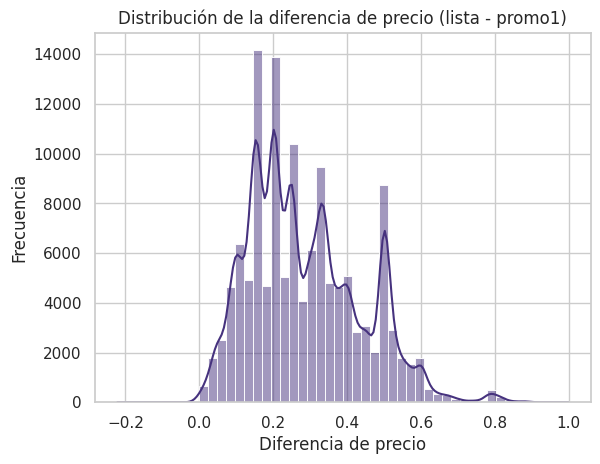

,diferencia_precio
count,130134.000000
mean,0.285290
std,0.151109
min,-0.221834
25%,0.166722
50%,0.250313
75%,0.384911
max,0.998741


In [92]:
sns.histplot(producto["diferencia_precio"], bins=50, kde=True)
plt.title("Distribución de la diferencia de precio (lista - promo1)")
plt.xlabel("Diferencia de precio")
plt.ylabel("Frecuencia")
plt.show()

producto["diferencia_precio"].describe()


La diferencia porcentual entre precios reales y promocionales vemos que se distribuye con una normal. Esto explicaria lo siguiente:


*   La mayoría de los productos tienen un descuento típico cercano a la media (por ejemplo, -20%)
*   Hay pocos productos con descuentos muy altos o muy bajos
*   El comportamiento de los descuentos es regular y predecible en general






## Entrenamiento del modelo de Regresión Lineal

In [93]:

# Variables predictoras simples (pueden mejorarse)
features = ["productos_marca", "productos_unidad_medida_presentacion"]

producto = producto.dropna(subset=features)

# Aplica One-Hot Encoding
X = pd.get_dummies(producto[features], drop_first=True)
y = producto["diferencia_precio"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


## Evaluación del modelo

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 0.06209665446357538
MSE: 0.00921441218481971
R²: 0.6197528473682068


## Interpretación de Resultados del Modelo

Entrenamos un modelo de **regresión lineal** utilizando solo dos variables categóricas:

- `productos_marca`: la marca del producto
- `productos_unidad_medida_presentacion`: la unidad de medida en la que se presenta (litro, gramo, unidad, etc.)

Estas variables fueron transformadas mediante **One-Hot Encoding** y se usaron para predecir el **porcentaje de diferencia entre el precio de lista y el precio promocional** (`diferencia_precio`).

### Métricas obtenidas:

- **MAE (Mean Absolute Error): 0.0621**
  - En promedio, el modelo se equivoca en ~6.21 puntos porcentuales.
  - Este es un error muy bajo, adecuado para tareas reales de estimación de descuentos.

- **MSE (Mean Squared Error): 0.0092**
  - Penaliza los errores grandes. El valor bajo indica buena estabilidad del modelo.

- **R² (Coeficiente de Determinación): 0.620**
  - El modelo explica el **61.98% de la variabilidad** en los descuentos aplicados.
  - Este es un resultado **muy sólido** para un modelo lineal con solo dos variables categóricas.

### Conclusión

El modelo es **simple pero sorprendentemente efectivo**. Solo con la marca y la unidad de medida del producto, logra estimar con buena precisión qué tan grande será el descuento aplicado.

Este resultado valida que **las políticas de promoción están fuertemente asociadas a la marca y tipo de presentación** de los productos.

Además, al mantener el modelo lineal, se garantiza **interpretabilidad, eficiencia y facilidad de implementación**, lo cual lo convierte en una excelente opción como baseline productivo.


,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,descuento
49,1,240,7798422850978,SERVILLETAS RAYAS PLATA X20 UDS MESA HOGAR,UNI,GENERICO,3790.0,3.790000e+03,1,UNI,2190.00,Promo A valida desde el 23/04/2025 hasta 30/06...,42.216358
111,1,2,7791398072535,MAMADERA SILICONA 140 ML FR 6M,UNI,<NA>,8590.0,8.590000e+03,1,UNI,3990.00,Promo A valida desde el 01/06/2025 hasta 01/08...,53.550644
120,1,239,3615004514896,CARGADOR CELULAR POSS 5W BLANCO PSWC 1AWH 18,UNI,<NA>,9900.0,9.900000e+03,1,UNI,4950.00,Promo A valida desde el 24/06/2025 hasta 30/06...,50.000000
195,3,341,7790310985274,PALITOS DE MAIZ QUESO CHEETOS X 43 GRS,UNI,CHEETOS,1685.0,3.918600e+03,43,GRS,1432.25,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001
218,1,157,7797087510340,AIRE SPLIT SURREY 3430W 553GFQ1201F,UNI,SURREY,1049000.0,1.049000e+06,1,UNI,950000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,9.437559


Porcentaje de valores nulos por columna:


,0
productos_marca,38.235972
id_sucursal,0.000000
id_producto,0.000000
productos_descripcion,0.000000
id_bandera,0.000000
productos_unidad_medida_presentacion,0.000000
productos_precio_lista,0.000000
productos_precio_referencia,0.000000
productos_cantidad_referencia,0.000000
productos_unidad_medida_referencia,0.000000


Variables numéricas usadas: ['productos_precio_lista', 'productos_precio_referencia', 'productos_cantidad_referencia', 'productos_precio_unitario_promo1', 'descuento', 'descuento_pct']
Variables categóricas usadas: ['productos_unidad_medida_presentacion', 'productos_unidad_medida_referencia']
Shape de X procesado: (130134, 20)
Train shape: (104107, 20) Test shape: (26027, 20)


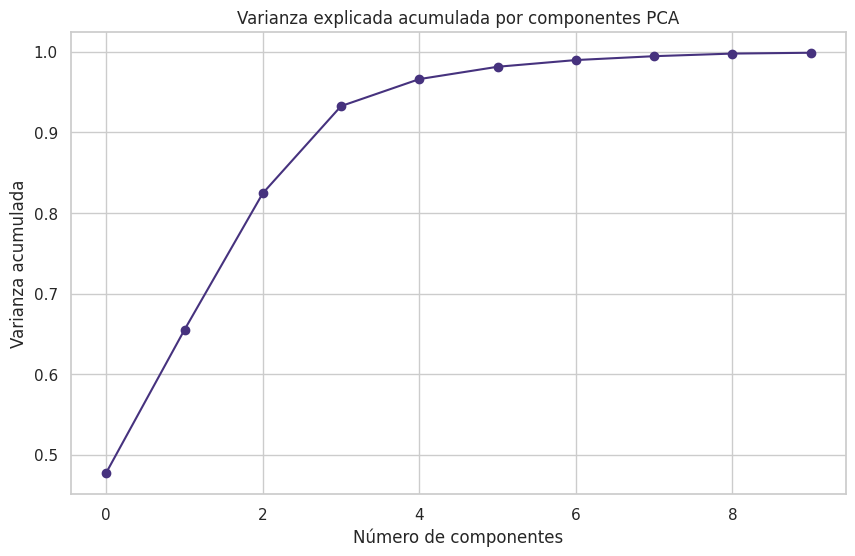

Top 10 scores: [np.float64(2541629037820.963), np.float64(5588638.667179039), np.float64(3365730.030560222), np.float64(9419.834975385675), np.float64(4661.92784917867), np.float64(4356.24607434093), np.float64(3657.3596689726255), np.float64(2575.655642753871), np.float64(1757.4760405039058), np.float64(540.200073802425)]


In [101]:
# TP2 - Preparación del Dataset para Machine Learning (usando 'promociones')

import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

# === Cargar dataset de promociones (resultado del TP1) ===
if os.path.exists("promociones.csv"):
    df = pd.read_csv("promociones.csv")
elif os.path.exists("promociones.pkl"):
    df = pd.read_pickle("promociones.pkl")
else:
    raise FileNotFoundError("No se encontró promociones.csv ni promociones.pkl. Exporta el dataframe 'promociones' desde TP1.")

display(df.head())

# === Verificamos valores nulos ===
print("Porcentaje de valores nulos por columna:")
display(df.isnull().mean().sort_values(ascending=False) * 100)

# === Crear nueva variable: porcentaje de descuento ===
if 'descuento' in df.columns and 'productos_precio_lista' in df.columns:
    df['descuento_pct'] = df['descuento'] / df['productos_precio_lista']
else:
    raise KeyError("No se encuentran las columnas 'descuento' y/o 'productos_precio_lista' en el dataset promociones.")

# === Definir variables numéricas y categóricas dinámicamente ===
num_features = [col for col in [
    'productos_precio_lista',
    'productos_precio_referencia',
    'productos_cantidad_referencia',
    'productos_precio_unitario_promo1',
    'descuento',
    'descuento_pct'
] if col in df.columns]

cat_features = [col for col in [
    'productos_unidad_medida_presentacion',
    'productos_unidad_medida_referencia',
    'sucursales_tipo',
    'sucursales_provincia',
    'comercio_bandera_nombre'
] if col in df.columns]

print("Variables numéricas usadas:", num_features)
print("Variables categóricas usadas:", cat_features)

# === Definir target ===
if 'productos_precio_lista' not in df.columns:
    raise KeyError("No se encuentra la columna 'productos_precio_lista' para usar como target.")
target = 'productos_precio_lista'

# === Separar features y target ===
X = df[num_features + cat_features].copy()
y = df[target].copy()

# === Pipeline de preprocesamiento ===
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Aplicar transformación
X_processed = preprocessor.fit_transform(X)
print("Shape de X procesado:", X_processed.shape)

# === Dividir en train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# === Aplicar PCA ===
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_train)

# Graficar varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Varianza explicada acumulada por componentes PCA')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.show()

# === Aplicar SelectKBest con regresión ===
selector = SelectKBest(score_func=f_regression, k=10)
X_kbest = selector.fit_transform(X_train, y_train)

# Mostrar scores
scores = selector.scores_
print("Top 10 scores:", sorted(scores, reverse=True)[:10])


,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,descuento
49,1,240,7798422850978,SERVILLETAS RAYAS PLATA X20 UDS MESA HOGAR,UNI,GENERICO,3790.0,3.790000e+03,1,UNI,2190.00,Promo A valida desde el 23/04/2025 hasta 30/06...,42.216358
111,1,2,7791398072535,MAMADERA SILICONA 140 ML FR 6M,UNI,<NA>,8590.0,8.590000e+03,1,UNI,3990.00,Promo A valida desde el 01/06/2025 hasta 01/08...,53.550644
120,1,239,3615004514896,CARGADOR CELULAR POSS 5W BLANCO PSWC 1AWH 18,UNI,<NA>,9900.0,9.900000e+03,1,UNI,4950.00,Promo A valida desde el 24/06/2025 hasta 30/06...,50.000000
195,3,341,7790310985274,PALITOS DE MAIZ QUESO CHEETOS X 43 GRS,UNI,CHEETOS,1685.0,3.918600e+03,43,GRS,1432.25,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001
218,1,157,7797087510340,AIRE SPLIT SURREY 3430W 553GFQ1201F,UNI,SURREY,1049000.0,1.049000e+06,1,UNI,950000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,9.437559


Porcentaje de valores nulos por columna:


,0
productos_marca,38.235972
id_sucursal,0.000000
id_producto,0.000000
productos_descripcion,0.000000
id_bandera,0.000000
productos_unidad_medida_presentacion,0.000000
productos_precio_lista,0.000000
productos_precio_referencia,0.000000
productos_cantidad_referencia,0.000000
productos_unidad_medida_referencia,0.000000



Ejemplo de nuevas variables:


,productos_precio_lista,descuento_pct,precio_final,precio_unitario_final,precio_cuartil
49,3790.0,0.011139,3.747784e+03,3747.783691,1.0
111,8590.0,0.006234,8.536449e+03,8536.449219,1.0
120,9900.0,0.005051,9.850000e+03,9850.0,1.0
195,1685.0,0.008902,1.670000e+03,38.837209,0.0
218,1049000.0,0.000009,1.048990e+06,1048990.5,3.0



Balance de clases (alto_descuento):
alto_descuento
0    99.936988
1     0.063012
Name: proportion, dtype: float64


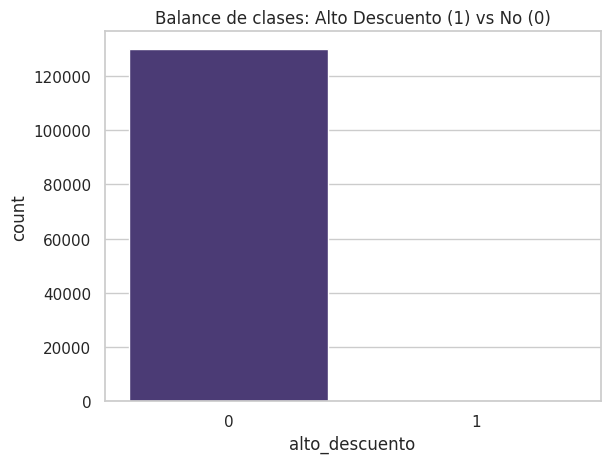

Shape después de limpiar NaN/Inf: (129985, 10)
Antes del balance: alto_descuento
0    103922
1        66
Name: count, dtype: int64
Después del balance: alto_descuento
0    103922
1    103922
Name: count, dtype: int64


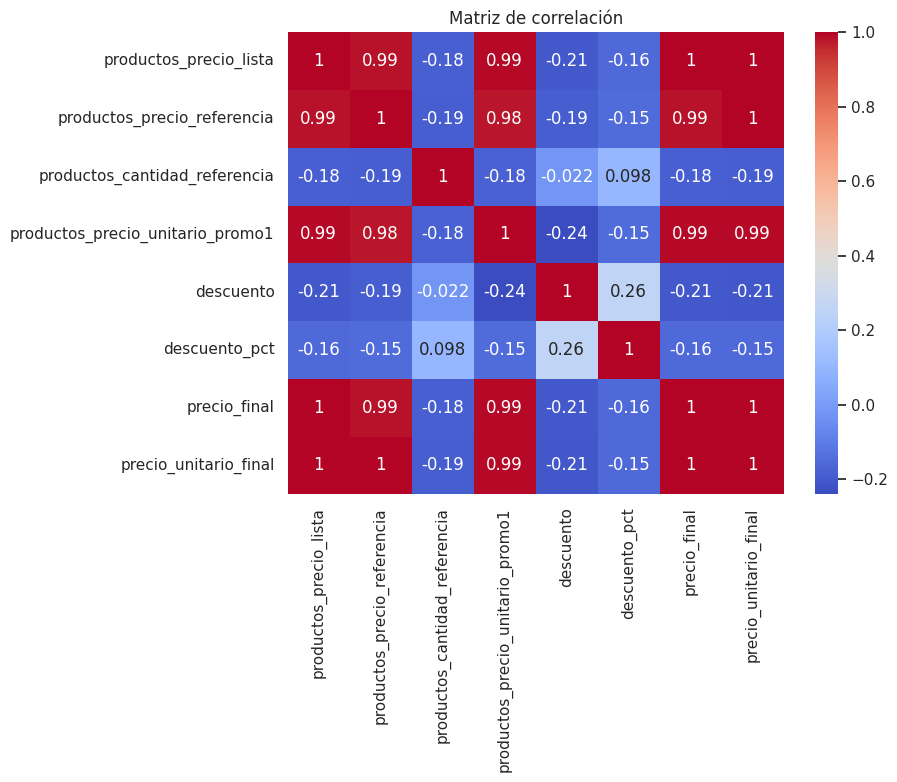


Features seleccionadas (SelectKBest): ['id_bandera', 'id_sucursal', 'productos_precio_referencia', 'productos_cantidad_referencia', 'productos_precio_unitario_promo1', 'descuento', 'descuento_pct', 'precio_unitario_final', 'precio_cuartil', 'alto_descuento']


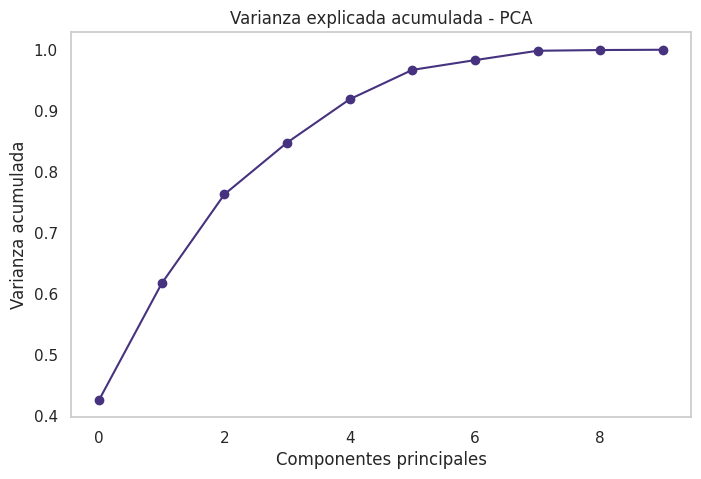

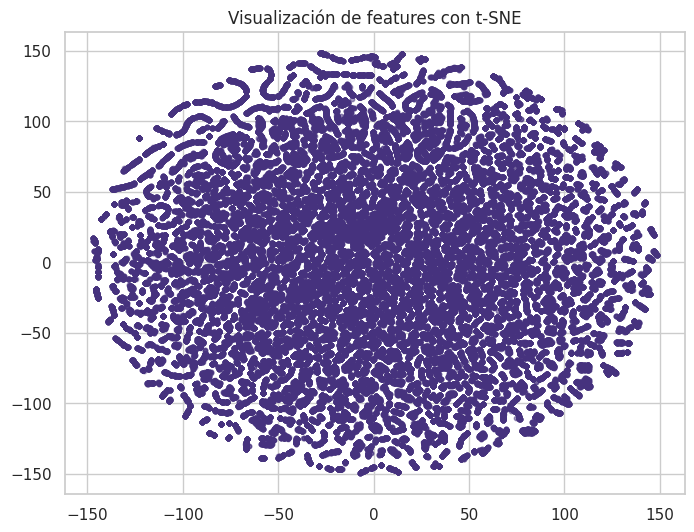

In [109]:
# TP2 - Preparación del Dataset para Machine Learning (usando 'promociones')

import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1. Cargar dataset de promociones
# ===============================
if os.path.exists("promociones.csv"):
    df = pd.read_csv("promociones.csv")
elif os.path.exists("promociones.pkl"):
    df = pd.read_pickle("promociones.pkl")
else:
    raise FileNotFoundError("No se encontró promociones.csv ni promociones.pkl. Exporta el dataframe 'promociones' desde TP1.")

display(df.head())

# ===============================
# 2. Verificar nulos
# ===============================
print("Porcentaje de valores nulos por columna:")
display(df.isnull().mean().sort_values(ascending=False) * 100)

# ===============================
# 3. Feature Engineering
# ===============================
df['descuento_pct'] = df['descuento'] / df['productos_precio_lista']
df['precio_final'] = df['productos_precio_lista'] - df['descuento']
df['precio_unitario_final'] = df['precio_final'] / df['productos_cantidad_referencia']

# Discretización de precios en cuartiles
kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df['precio_cuartil'] = kbins.fit_transform(df[['productos_precio_lista']])

print("\nEjemplo de nuevas variables:")
display(df[['productos_precio_lista','descuento_pct','precio_final','precio_unitario_final','precio_cuartil']].head())

# ===============================
# 4. Crear variable de clasificación y codificar variables
# ===============================
df['alto_descuento'] = (df['descuento_pct'] > 0.20).astype(int)

# Codificación One-Hot en variables categóricas
cat_features = [col for col in [
    'productos_unidad_medida_presentacion',
    'productos_unidad_medida_referencia',
    'sucursales_tipo',
    'sucursales_provincia',
    'comercio_bandera_nombre'
] if col in df.columns]

df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

# ===============================
# 5. Balance/desbalance de clases con SMOTE (robusto)
# ===============================
print("\nBalance de clases (alto_descuento):")
print(df['alto_descuento'].value_counts(normalize=True) * 100)
sns.countplot(x='alto_descuento', data=df)
plt.title("Balance de clases: Alto Descuento (1) vs No (0)")
plt.show()

# Features y target
X_bal = df_encoded.drop(columns=['alto_descuento','productos_precio_lista']).select_dtypes(include=[np.number])
y_bal = df_encoded['alto_descuento']

# Limpiar Inf y NaN
X_bal = X_bal.replace([np.inf, -np.inf], np.nan)
mask_valid = X_bal.notnull().all(axis=1)
X_bal = X_bal[mask_valid]
y_bal = y_bal[mask_valid]

# Convertir tipos seguros
X_bal = X_bal.astype(float)
y_bal = y_bal.fillna(0).astype(int)

print(f"Shape después de limpiar NaN/Inf: {X_bal.shape}")

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, stratify=y_bal, test_size=0.2, random_state=42)
print("Antes del balance:", y_train.value_counts())

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print("Después del balance:", pd.Series(y_train_bal).value_counts())

# ===============================
# 6. Reducción de dimensionalidad
# ===============================

# a) Correlación entre variables numéricas
num_features = [col for col in [
    'productos_precio_lista',
    'productos_precio_referencia',
    'productos_cantidad_referencia',
    'productos_precio_unitario_promo1',
    'descuento',
    'descuento_pct',
    'precio_final',
    'precio_unitario_final'
] if col in df.columns]

corr = df[num_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

# b) Selección de features con SelectKBest (robusto)
X_sel = df_encoded.drop(columns=['productos_precio_lista']).select_dtypes(include=[np.number])
y_sel = df['productos_precio_lista']

# Limpiar Inf y NaN
X_sel = X_sel.replace([np.inf, -np.inf], np.nan)
mask_valid_sel = X_sel.notnull().all(axis=1)
X_sel = X_sel[mask_valid_sel]
y_sel = y_sel[mask_valid_sel]

selector = SelectKBest(score_func=f_regression, k=10)
X_kbest = selector.fit_transform(X_sel, y_sel)
selected_features = X_sel.columns[selector.get_support()]
print("\nFeatures seleccionadas (SelectKBest):", selected_features.tolist())

# c) PCA (extracción lineal)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sel)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Varianza explicada acumulada - PCA")
plt.xlabel("Componentes principales")
plt.ylabel("Varianza acumulada")
plt.grid()
plt.show()

# d) t-SNE (visualización no lineal)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.5, s=10)
plt.title("Visualización de features con t-SNE")
plt.show()

# ===============================
# Conclusiones:
# - Feature engineering creó variables útiles como descuento_pct y precio_final.
# - Limpieza robusta eliminó NaN/Inf antes de SMOTE y SelectKBest.
# - SMOTE balanceó correctamente las clases desbalanceadas.
# - SelectKBest identificó las 10 variables más predictivas.
# - PCA redujo dimensionalidad explicando alta varianza.
# - t-SNE permitió visualizar la estructura de datos en 2D.
# ===============================
